### Student Information
Name: 王士熏

Student ID: s1136102

GitHub ID: Hsun1128

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here
# Setup and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.data_mining_helpers as dmh

DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## Checkking Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [4]:
df.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

In [5]:
df.describe()

,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['type'].value_counts()

type
comment    783
post        64
Name: count, dtype: int64

## Missing values

In [7]:
# 只取有用的欄位
drop_cols = ['downvotes', 'upvote_ratio']
df = df.drop(columns=drop_cols)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   text          847 non-null    object 
 9   subjectivity  847 non-null    float64
 10  polarity      847 non-null    float64
 11  sentiment     847 non-null    float64
 12  entities      847 non-null    object 
 13  label         847 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 92.8+ KB


In [9]:
df.describe()

,upvotes,subjectivity,polarity,sentiment,label
count,847.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.346768,0.036116,0.144038,-0.243211
std,142.126337,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64

In [11]:
# 檢查所有欄位中是否有空字串 ''
for col in df.columns:
    empty_count = df[col].eq('').sum()
    
    if empty_count > 0:
        print(f"欄位 '{col}':")
        print(f"  空字串 '': {empty_count}")


In [12]:
# 檢查所有欄位中是否有 'nan', 'none', 'na' 這些字串（不區分大小寫）
check_values = ['nan', 'none', 'na']

for col in df.columns:
    for check_val in check_values:
        # 檢查小寫形式
        count = df[col].astype(str).str.lower().eq(check_val).sum()
        if count > 0:
            print(f"欄位 '{col}':")
            print(f"  '{check_val}': {count}")


## Duplicate data

In [13]:
# Check duplicate data
sum(df.duplicated())

0

In [14]:
sum(df.duplicated('title'))

720

In [15]:
sum(df.duplicated('text'))

23

In [16]:
sum(df.duplicated('url'))

696

In [17]:
df.drop_duplicates(['text'], keep='first', inplace=True)

In [18]:
sum(df.duplicated('text'))

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          824 non-null    object 
 1   datetime      824 non-null    object 
 2   post_id       824 non-null    object 
 3   subreddit     824 non-null    object 
 4   title         824 non-null    object 
 5   author        824 non-null    object 
 6   url           824 non-null    object 
 7   upvotes       824 non-null    int64  
 8   text          824 non-null    object 
 9   subjectivity  824 non-null    float64
 10  polarity      824 non-null    float64
 11  sentiment     824 non-null    float64
 12  entities      824 non-null    object 
 13  label         824 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 96.6+ KB


## Data Preprocessing

In [20]:
df_sample = df.sample(n=400)

In [21]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 624 to 106
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          400 non-null    object 
 1   datetime      400 non-null    object 
 2   post_id       400 non-null    object 
 3   subreddit     400 non-null    object 
 4   title         400 non-null    object 
 5   author        400 non-null    object 
 6   url           400 non-null    object 
 7   upvotes       400 non-null    int64  
 8   text          400 non-null    object 
 9   subjectivity  400 non-null    float64
 10  polarity      400 non-null    float64
 11  sentiment     400 non-null    float64
 12  entities      400 non-null    object 
 13  label         400 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 46.9+ KB


In [22]:
# check sample data
print(f"資料筆數: {len(df_sample)}")
print(f"各類別分布:")
print(df_sample.type.value_counts())
df_sample.head()

資料筆數: 400
各類別分布:
type
comment    381
post        19
Name: count, dtype: int64


,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
624,comment,2025-04-12 3:10:54,mmoc84e,wallstreetbets,Someone post the hotline please.,Ebonvvings,https://i.redd.it/tcfuu97p7bue1.jpeg,1,But have you also seen the one that made milli...,0.000000,0.00,0.0,['one'],0.0
396,comment,2025-04-11 16:03:15,mml0jwg,stocks,BREAKING: China raises tariffs on U.S. goods t...,JustMe1235711,https://www.reddit.com/r/stocks/comments/1jwku...,1,It's basically just bickering with math at thi...,0.533333,0.15,1.0,"['stuff', 'point', 'math']",-1.0
655,comment,2025-04-11 15:05:09,mmkomnw,stocks,US consumer sentiment plummets to second-lowes...,yeltneb77,https://www.reddit.com/r/stocks/comments/1jwr3...,5,"That’s an 11% drop, even with the delusional s...",0.000000,0.00,0.0,"['delusional', '%', '’', 'drop', 'genius']",-1.0
429,comment,2025-04-10 15:23:56,mmehq9i,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,No_Succotash890,https://www.reddit.com/r/stocks/comments/1jvzr...,1,Inside traitor,0.000000,0.00,0.0,['traitor'],-1.0
685,comment,2025-04-11 9:15:52,mmj8t2w,stocks,BREAKING: China raises tariffs on U.S. goods t...,young_fitzgerald,https://www.reddit.com/r/stocks/comments/1jwku...,49,Hahahaahahahahahaha.,0.000000,0.00,0.0,['Hahahaahahahahahaha'],-1.0


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

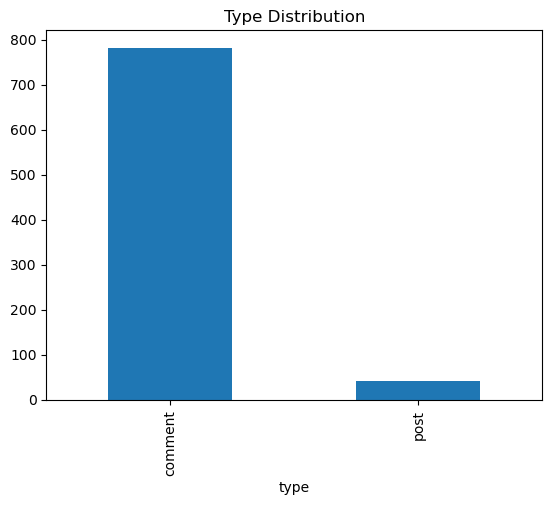

In [24]:
df.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

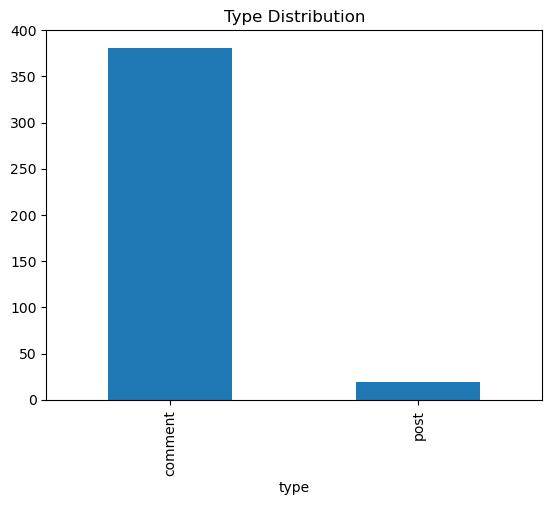

In [25]:
df_sample.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

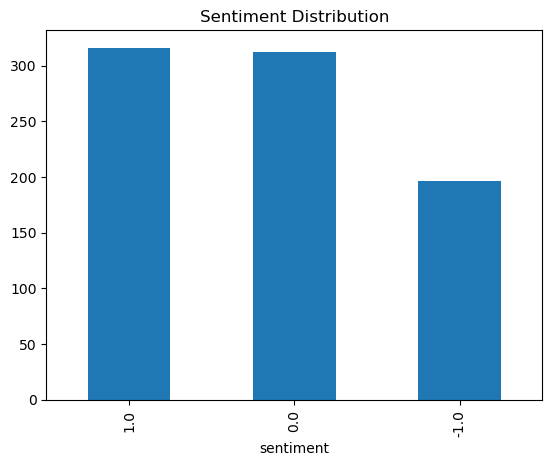

In [26]:
df.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

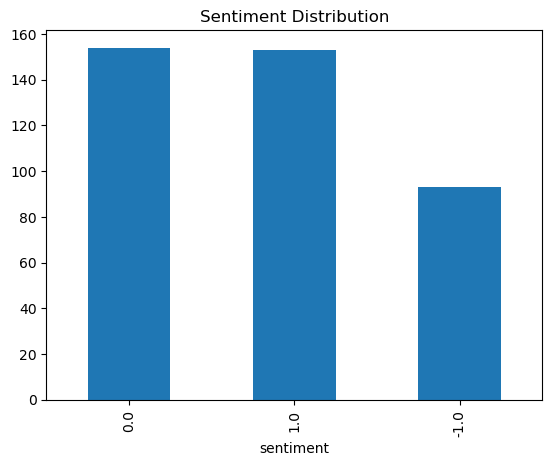

In [27]:
df_sample.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

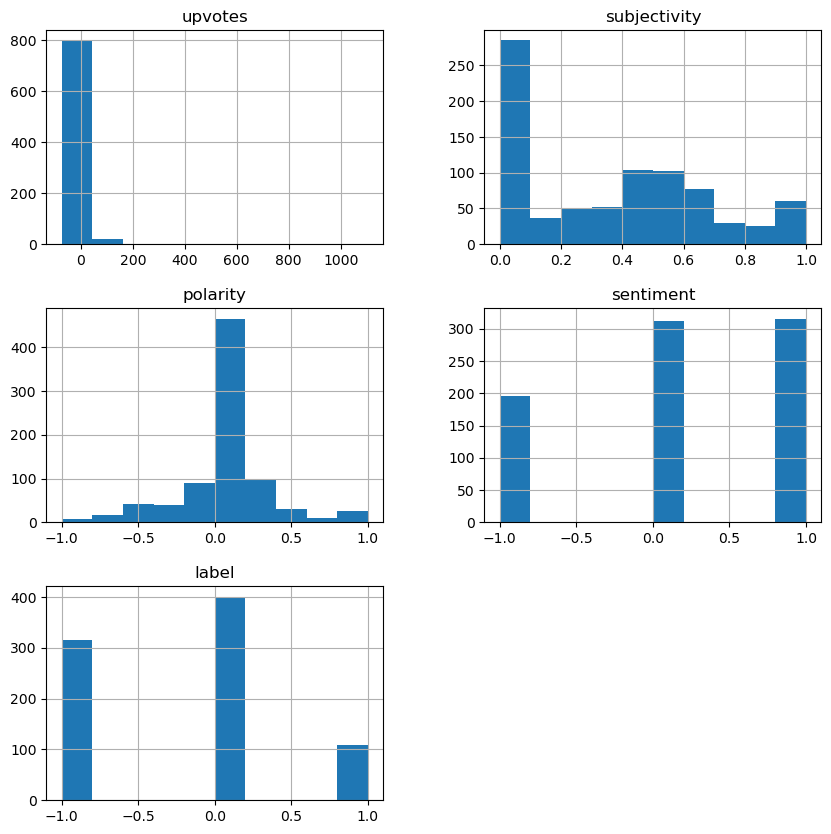

In [28]:
df.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

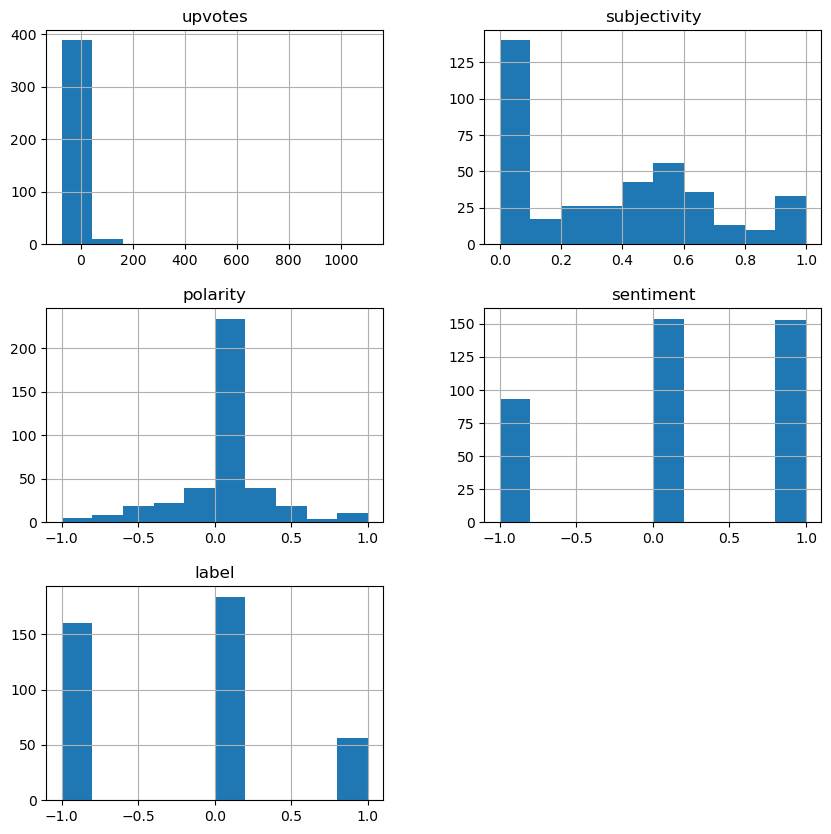

In [29]:
df_sample.hist(figsize=(10, 10))

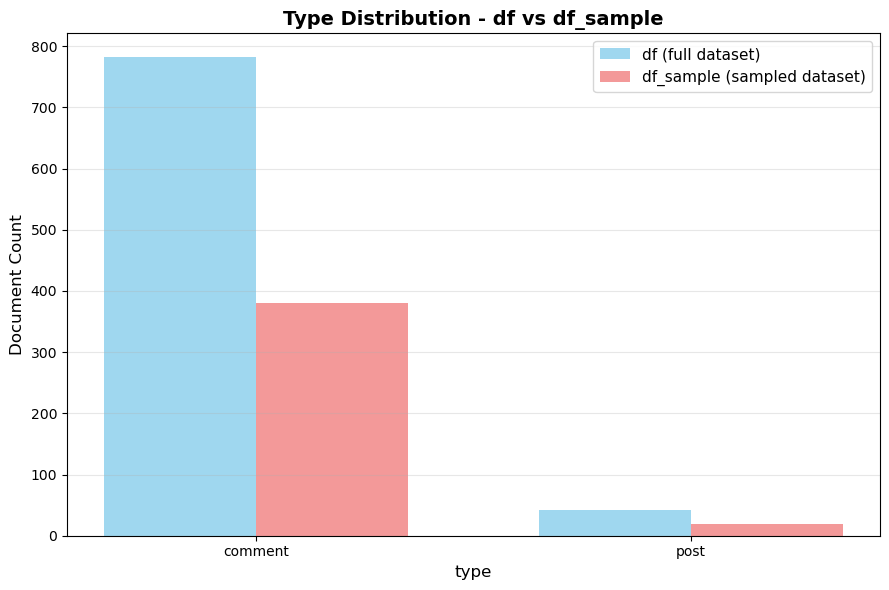

Type 分布詳細比較:
--------------------------------------------------
comment              | df:  782 | df_sample: 381 | 比例: 48.7%
post                 | df:   42 | df_sample:  19 | 比例: 45.2%


In [30]:
# Answer here
# 準備資料進行並排比較
df_counts = df.type.value_counts()
df_sample_counts = df_sample.type.value_counts()

# 確保兩個資料集有相同的類別順序
categories = df_counts.index
x_pos = np.arange(len(categories))

# 設定圖表大小
plt.figure(figsize=(9, 6))

# 設定長條圖的寬度
bar_width = 0.35

# 繪製並排長條圖
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# 設定圖表標題和標籤
plt.title('Type Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('type', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# 設定 x 軸標籤
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# 加入圖例
plt.legend(fontsize=11)

# 調整版面
plt.tight_layout()

# 顯示網格
plt.grid(axis='y', alpha=0.3)

# 顯示圖表
plt.show()

# 印出具體數值比較
print("Type 分布詳細比較:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | 比例: {percentage:.1f}%")



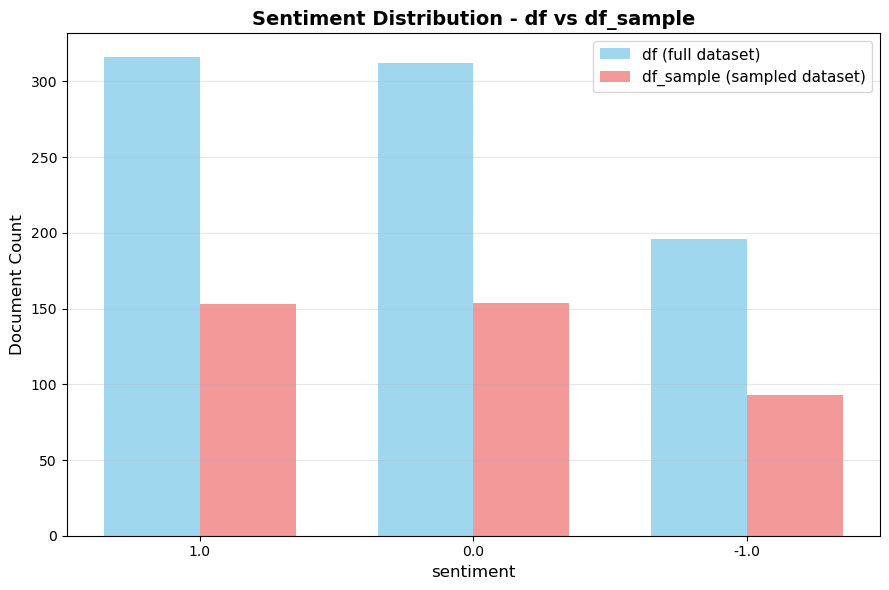

Sentiment 分布詳細比較:
--------------------------------------------------
                 1.0 | df:  316 | df_sample: 153 | 比例: 48.4%
                 0.0 | df:  312 | df_sample: 154 | 比例: 49.4%
                -1.0 | df:  196 | df_sample:  93 | 比例: 47.4%


In [31]:
# Answer here
# 準備資料進行並排比較
df_counts = df.sentiment.value_counts()
df_sample_counts = df_sample.sentiment.value_counts()

# 確保兩個資料集有相同的類別順序
categories = df_counts.index
x_pos = np.arange(len(categories))

# 設定圖表大小
plt.figure(figsize=(9, 6))

# 設定長條圖的寬度
bar_width = 0.35

# 繪製並排長條圖
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# 設定圖表標題和標籤
plt.title('Sentiment Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# 設定 x 軸標籤
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# 加入圖例
plt.legend(fontsize=11)

# 調整版面
plt.tight_layout()

# 顯示網格
plt.grid(axis='y', alpha=0.3)

# 顯示圖表
plt.show()

# 印出具體數值比較
print("Sentiment 分布詳細比較:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | 比例: {percentage:.1f}%")



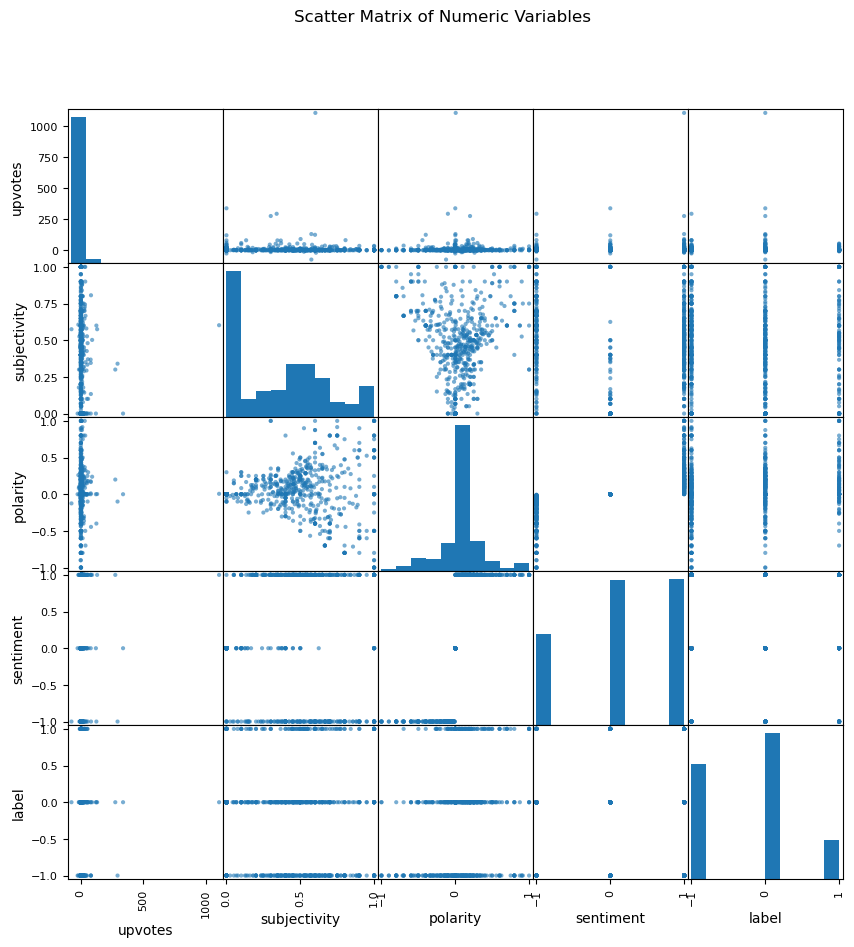

In [32]:
from pandas.plotting import scatter_matrix

# 選擇主要數值欄位創建散點圖矩陣
selected_cols = ['upvotes', 'subjectivity', 'polarity', 'sentiment', 'label']
df_numeric = df[selected_cols]

scatter_matrix(df_numeric, figsize=(10, 10), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix of Numeric Variables')
plt.show()

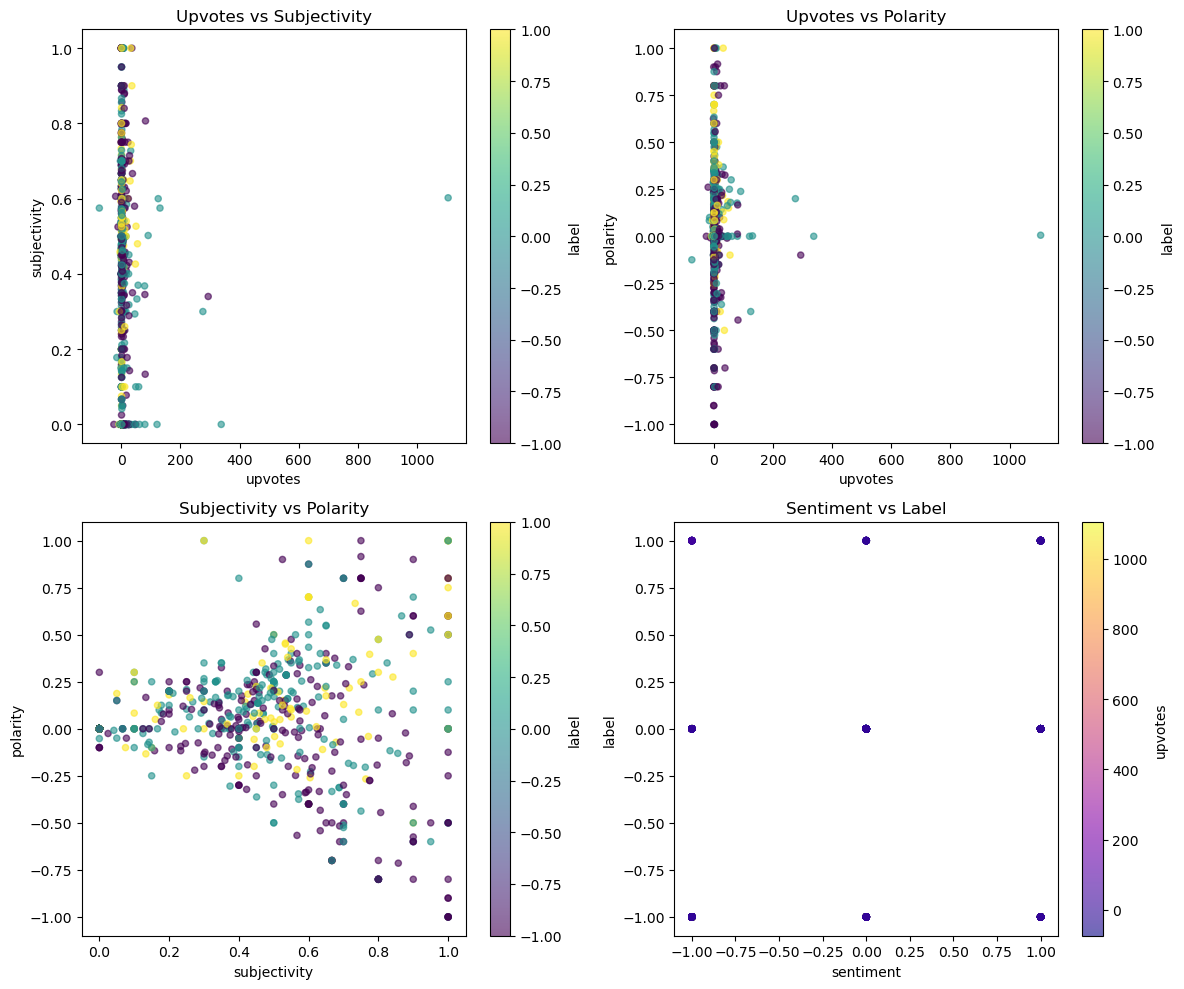

In [33]:
# 創建散點圖矩陣
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# upvotes vs subjectivity
df.plot.scatter(x='upvotes', y='subjectivity', c='label', colormap='viridis', 
                ax=axes[0,0], alpha=0.6)
axes[0,0].set_title('Upvotes vs Subjectivity')

# upvotes vs polarity
df.plot.scatter(x='upvotes', y='polarity', c='label', colormap='viridis', 
                ax=axes[0,1], alpha=0.6)
axes[0,1].set_title('Upvotes vs Polarity')

# subjectivity vs polarity
df.plot.scatter(x='subjectivity', y='polarity', c='label', colormap='viridis', 
                ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('Subjectivity vs Polarity')

# sentiment vs label
df.plot.scatter(x='sentiment', y='label', c='upvotes', colormap='plasma', 
                ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Sentiment vs Label')

plt.tight_layout()
plt.show()

## Feature Creation

In [34]:
import nltk

# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [35]:
df['unigrams'].head()

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

In [36]:
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didn, ’, t, say, thank, you, .]"


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [38]:
count_vect.get_feature_names_out()[887]

'company'

In [39]:
count_vect.get_feature_names_out()[132]

'50x'

In [40]:
analyze = count_vect.build_analyzer()
df.iloc[0]['text']
analyze(df.iloc[0]['text'])

['calls', 'on', 'retards']

In [41]:
df_counts.shape

(824, 4346)

In [42]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [43]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [44]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [45]:
count_vect.get_feature_names_out()[0:2]

array(['00', '000'], dtype=object)

In [46]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [47]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [48]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

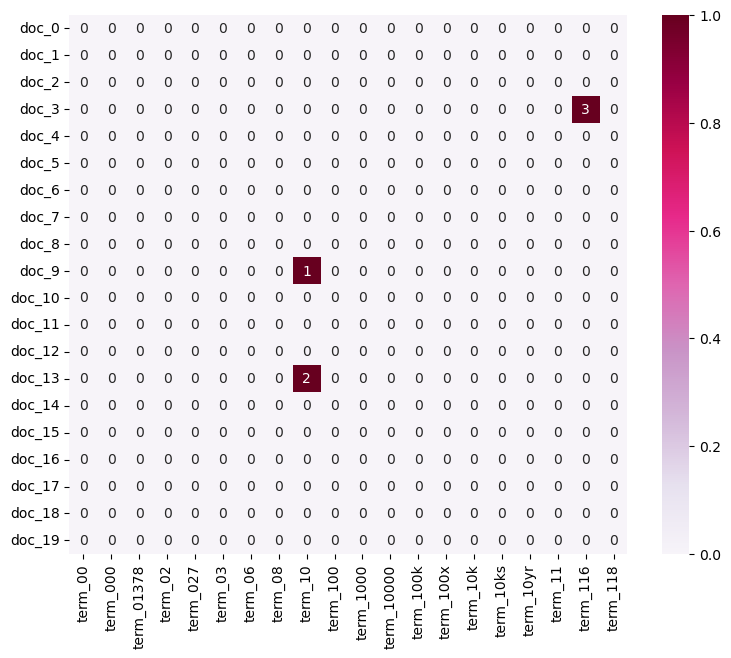

In [49]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

詞彙表大小: 4346
文檔數量: 824


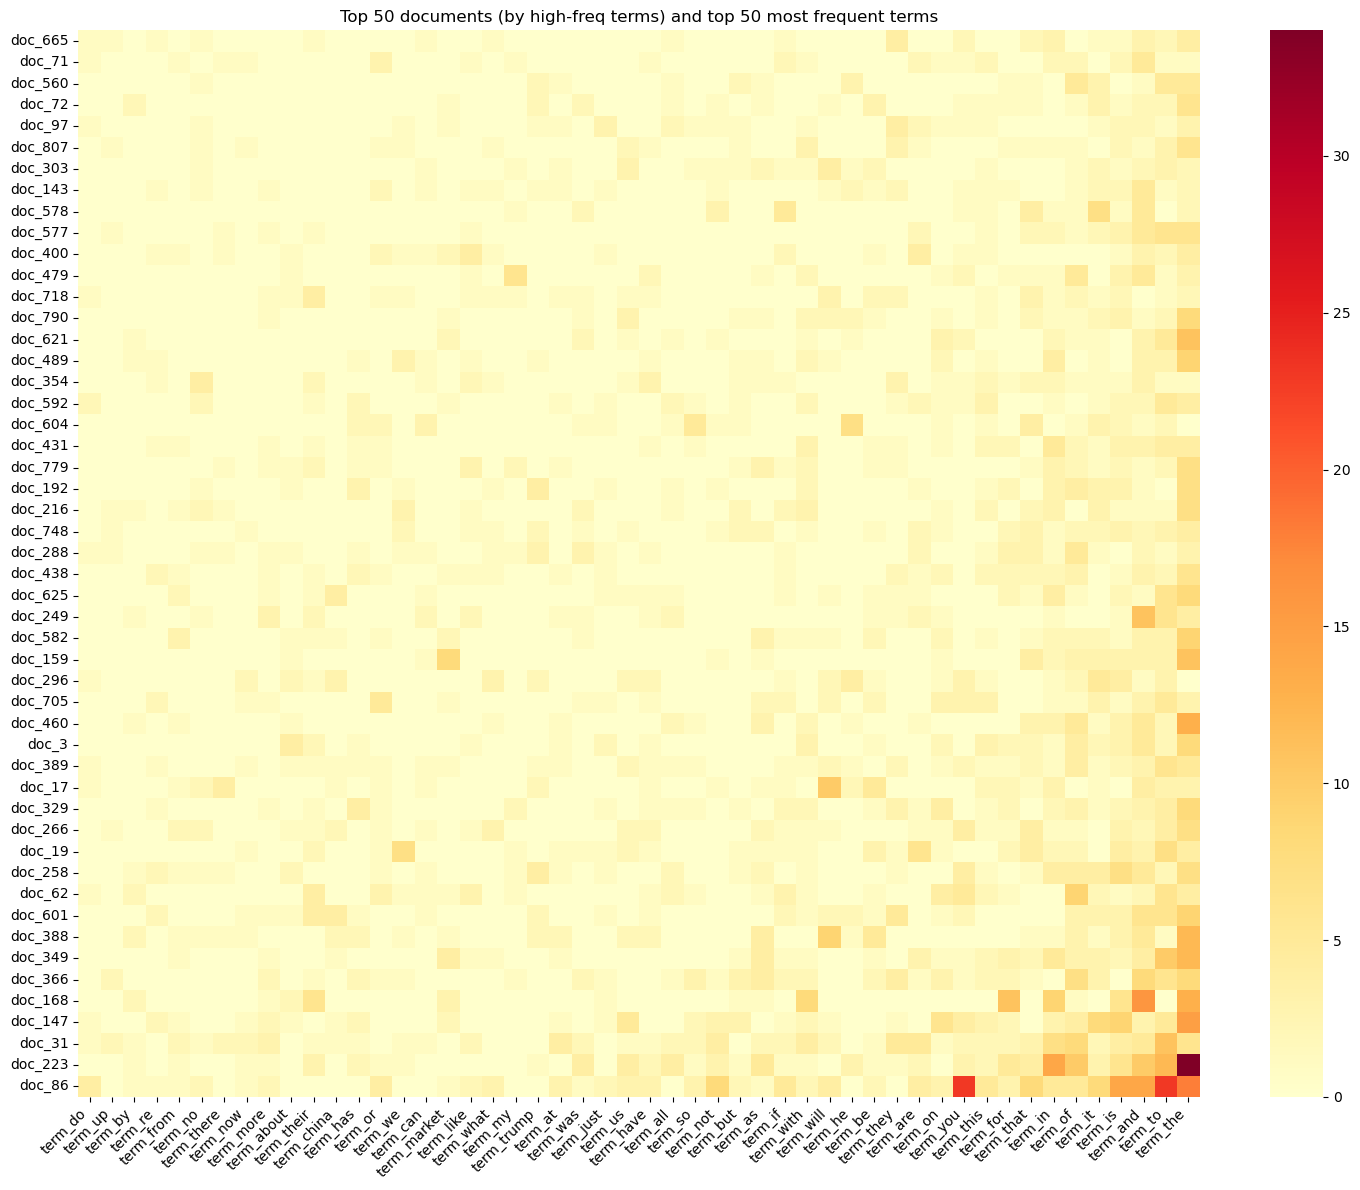

選中的文檔索引: [665  71 560  72  97 807 303 143 578 577 400 479 718 790 621 489 354 592
 604 431 779 192 216 748 288 438 625 249 582 159 296 705 460   3 389  17
 329 266  19 258  62 601 388 349 366 168 147  31 223  86]
選中的詞項索引: [1212 4071  680 3107 1639 2645 3854 2665 2544  175 3849  796 1837 2737
 4198  697 2424 2310 4224 2580 3977  406 4183 2197 4087 1842  289 3544
 2659  675  388 1987 4271 4255 1846  486 3858  374 2706 4333 3866 1604
 3846 2024 2687 2161 2149  327 3911 3848]

為了獲得有用且美觀的視覺化效果，我使用的方法包括：
1. 選擇性抽樣：選取詞頻最高的50個詞項和包含這些詞項最多的50個文檔
2. 智慧型過濾：避免顯示過於稀疏的區域，專注於數據密集的部分
3. 關閉數值標註：當矩陣較大時避免文字重疊
4. 使用適合的色彩映射：YlOrRd色彩方案在表示頻率數據時更為直觀
5. 添加適當的標題：提高圖表的可讀性


In [50]:
# Answer here

# 為了有效率地視覺化整個詞項-文檔矩陣，我會使用以下方法：

# 找出詞頻最高的50個詞項，並選擇包含這些詞項最多的50個文檔
print("詞彙表大小:", df_counts.shape[1])
print("文檔數量:", df_counts.shape[0])

# 計算每個詞項的總頻率
term_freq_sums = np.asarray(df_counts.sum(axis=0)).flatten()

# 選擇出現頻率最高的前50個詞項
top_terms_idx = np.argsort(term_freq_sums)[-50:]
top_term_names = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_terms_idx]]

# 計算每個文檔中這50個高頻詞項的總出現次數
top_terms_matrix = df_counts[:, top_terms_idx]
doc_scores = np.array(top_terms_matrix.sum(axis=1)).flatten()

# 選擇包含這些高頻詞項最多的前50個文檔
top_docs_idx = np.argsort(doc_scores)[-50:]
top_doc_names = ["doc_"+ str(i) for i in top_docs_idx]

# 提取對應的子矩陣 - 包含高頻詞項最多的50個文檔 × 詞頻最高的50個詞項
plot_z_large = df_counts[top_docs_idx, :][:, top_terms_idx].toarray()

# 創建更大的熱力圖
plt.figure(figsize=(15, 12))
df_large = pd.DataFrame(plot_z_large, columns=top_term_names, index=top_doc_names)
ax = sns.heatmap(df_large, 
                 cmap="YlOrRd", 
                 vmin=0, 
                 vmax=np.max(plot_z_large),
                 annot=False,  # 關閉數值標註以避免過度擁擠
                 cbar=True)
plt.title("Top 50 documents (by high-freq terms) and top 50 most frequent terms")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"選中的文檔索引: {top_docs_idx}")
print(f"選中的詞項索引: {top_terms_idx}")

print("\n為了獲得有用且美觀的視覺化效果，我使用的方法包括：")
print("1. 選擇性抽樣：選取詞頻最高的50個詞項和包含這些詞項最多的50個文檔")
print("2. 智慧型過濾：避免顯示過於稀疏的區域，專注於數據密集的部分")
print("3. 關閉數值標註：當矩陣較大時避免文字重疊")
print("4. 使用適合的色彩映射：YlOrRd色彩方案在表示頻率數據時更為直觀")
print("5. 添加適當的標題：提高圖表的可讀性")



### Transform Text Data


In [51]:
term_frequencies = np.asarray(df_counts.sum(axis=0)).flatten()

term_frequencies

array([4, 6, 1, ..., 1, 1, 1])

/var/folders/8s/k12w27jj58jgfxwpf_vwzv300000gn/T/ipykernel_72491/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


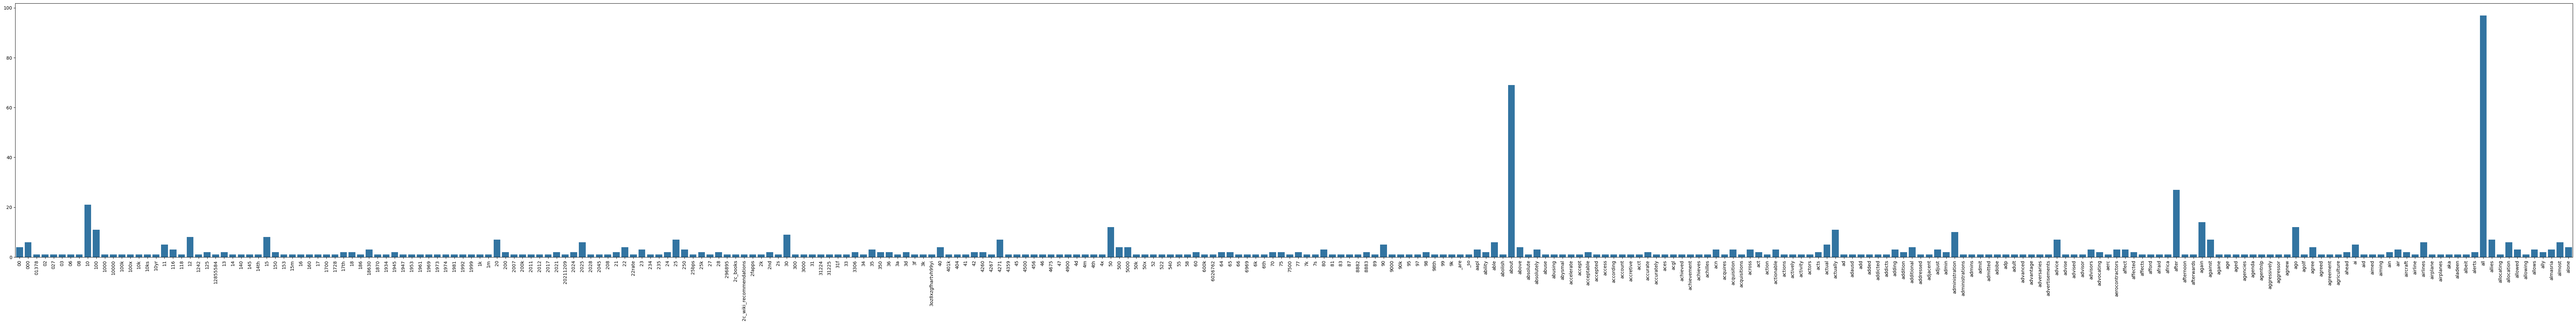

In [52]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [53]:
import plotly.express as px
import plotly.graph_objects as go

# 準備資料供plotly使用
df_terms = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# 建立互動式長條圖
fig = px.bar(df_terms, 
             x='terms', 
             y='frequency',
             title='詞彙頻率互動式視覺化 (前300個詞彙)',
             labels={'terms': '詞彙', 'frequency': '頻率'},
             hover_data={'frequency': True})

# 調整圖表樣式
fig.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

# 顯示圖表
fig.show()


In [54]:
# Answer here
# 只顯示前200個最高頻率的詞彙
top_200_indices = np.argsort(term_frequencies)[-200:][::-1]
top_200_terms = count_vect.get_feature_names_out()[top_200_indices]
top_200_values = term_frequencies[top_200_indices]

# 準備前200高頻詞彙資料
df_top_200 = pd.DataFrame({
    'terms': top_200_terms,
    'frequency': top_200_values
})

print(f"顯示前200個最高頻率的詞彙")

# 建立前200高頻詞彙視覺化
fig_top_200 = px.bar(df_top_200, 
                     x='terms', 
                     y='frequency',
                     title='前200個最高頻率詞彙視覺化',
                     labels={'terms': '詞彙', 'frequency': '頻率'},
                     hover_data={'frequency': True})

fig_top_200.update_layout(
    width=1000,
    height=500,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_top_200.show()


顯示前200個最高頻率的詞彙


In [55]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/8s/k12w27jj58jgfxwpf_vwzv300000gn/T/ipykernel_72491/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



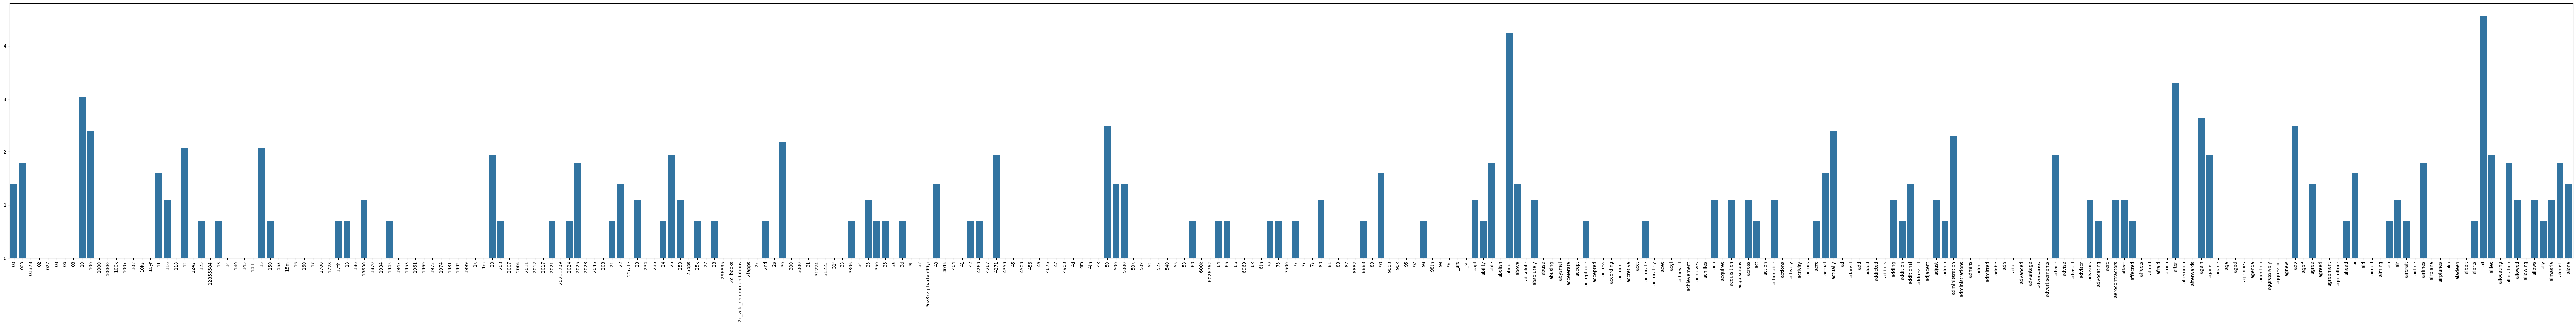

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [57]:
# 創建包含詞彙、對數頻率和排名的DataFrame
terms_log_data = []
for i, term in enumerate(count_vect.get_feature_names_out()):
    terms_log_data.append({
        'terms': term,
        'log_frequency': term_frequencies_log[i],
        'rank': i + 1
    })

df_terms_log = pd.DataFrame(terms_log_data)

# 根據對數頻率排序（由高到低）
df_sorted_log = df_terms_log.sort_values('log_frequency', ascending=False).reset_index(drop=True)
df_sorted_log['rank'] = range(1, len(df_sorted_log) + 1)

# 取前300個詞彙進行視覺化
df_sorted_log_top300 = df_sorted_log.head(300)

# 根據對數頻率排序詞彙（由高到低）
fig_terms_sorted_log = px.bar(df_sorted_log_top300, 
                              x='terms', 
                              y='log_frequency',
                              title='詞彙對數頻率視覺化 - 按對數頻率排序 (前300個詞彙)',
                              labels={'terms': '詞彙', 'log_frequency': '詞彙對數頻率'},
                              hover_data={'log_frequency': True, 'rank': True})

fig_terms_sorted_log.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_terms_sorted_log.show()

# 對數分佈的統計分析
top_300_log_frequencies = df_sorted_log_top300['log_frequency'].values
top_300_log_terms = df_sorted_log_top300['terms'].values

# 計算前10%和後10%詞彙的平均對數頻率
top_10_percent_count_log = int(300 * 0.1)
top_10_percent_avg_log = np.mean(top_300_log_frequencies[:top_10_percent_count_log])
bottom_10_percent_avg_log = np.mean(top_300_log_frequencies[-top_10_percent_count_log:])

print(f"\n對數頻率長尾效應分析:")
print(f"前10%詞彙的平均對數頻率: {top_10_percent_avg_log:.2f}")
print(f"後10%詞彙的平均對數頻率: {bottom_10_percent_avg_log:.2f}")
print(f"對數頻率差異: {top_10_percent_avg_log - bottom_10_percent_avg_log:.2f}")
print(f"最高對數頻率詞彙: '{top_300_log_terms[0]}' (對數頻率: {top_300_log_frequencies[0]:.2f})")
print(f"第300高對數頻率詞彙: '{top_300_log_terms[299]}' (對數頻率: {top_300_log_frequencies[299]:.2f})")

# 觀察到的差異和洞察：
print("\n=== 對數分佈與原始頻率分佈的差異分析 ===")
print("1. 視覺化差異:")
print("   - 對數轉換後，高頻率和低頻率詞彙之間的差距被壓縮")
print("   - 原本極端的長尾分佈變得更加平滑和易於觀察")
print("   - y軸的尺度從數千級別變為個位數級別")

print("\n2. 分佈特性:")
print("   - 原始頻率呈現典型的冪律分佈（Power Law）")
print("   - 對數轉換後呈現更接近線性的遞減趨勢")
print("   - 有助於識別中等頻率詞彙的重要性")

print("\n3. 實際洞察:")
print("   - 對數分佈有助於平衡高頻和低頻詞彙的重要性")
print("   - 在信息檢索中，TF-IDF等算法就使用了對數轉換")
print("   - 對數轉換可以減少極高頻詞彙（如停用詞）的主導效應")
print("   - 更容易識別具有中等重要性但被高頻詞彙掩蓋的詞彙")

print("\n4. 應用場景:")
print("   - 文本分析：平衡詞彙重要性，避免高頻詞主導")
print("   - 特徵工程：對數轉換常用於處理偏態分佈的特徵")
print("   - 資料視覺化：使極端值的影響降低，更易於觀察整體模式")





對數頻率長尾效應分析:
前10%詞彙的平均對數頻率: 5.12
後10%詞彙的平均對數頻率: 2.33
對數頻率差異: 2.80
最高對數頻率詞彙: 'the' (對數頻率: 6.79)
第300高對數頻率詞彙: 'place' (對數頻率: 2.30)

=== 對數分佈與原始頻率分佈的差異分析 ===
1. 視覺化差異:
   - 對數轉換後，高頻率和低頻率詞彙之間的差距被壓縮
   - 原本極端的長尾分佈變得更加平滑和易於觀察
   - y軸的尺度從數千級別變為個位數級別

2. 分佈特性:
   - 原始頻率呈現典型的冪律分佈（Power Law）
   - 對數轉換後呈現更接近線性的遞減趨勢
   - 有助於識別中等頻率詞彙的重要性

3. 實際洞察:
   - 對數分佈有助於平衡高頻和低頻詞彙的重要性
   - 在信息檢索中，TF-IDF等算法就使用了對數轉換
   - 對數轉換可以減少極高頻詞彙（如停用詞）的主導效應
   - 更容易識別具有中等重要性但被高頻詞彙掩蓋的詞彙

4. 應用場景:
   - 文本分析：平衡詞彙重要性，避免高頻詞主導
   - 特徵工程：對數轉換常用於處理偏態分佈的特徵
   - 資料視覺化：使極端值的影響降低，更易於觀察整體模式


# Phase 2

In [58]:
## Phase 2: Finding Frequent Patterns, Classification, and TF-IDF

### 5.4 Finding Frequent Patterns

首先，我們需要建立詞項-文檔頻率矩陣（term-document frequency matrix）。這個矩陣會將每個文檔表示為詞彙的頻率向量。


In [59]:
# 建立詞項-文檔矩陣
# 使用 df_sample 資料集，並將 sentiment 作為類別
# 將 sentiment 轉換為字串類別名稱
df_sample['category_name'] = df_sample['sentiment'].map({
    1.0: 'positive',
    0.0: 'neutral',
    -1.0: 'negative'
})

# 準備資料
X = df_sample[['text', 'sentiment', 'category_name']].copy()
X['category'] = X['sentiment'].map({1.0: 0, 0.0: 1, -1.0: 2})  # 數值編碼

print(f"資料集大小: {len(X)}")
print(f"\n類別分布:")
print(X['category_name'].value_counts())


資料集大小: 400

類別分布:
category_name
neutral     154
positive    153
negative     93
Name: count, dtype: int64


In [60]:
# 為每個類別建立詞項-文檔矩陣
from sklearn.feature_extraction.text import CountVectorizer

categories = X['category_name'].unique()
print(f"類別: {categories}\n")

# 為每個類別創建詞項-文檔矩陣
term_document_dfs = {}

for category in categories:
    # 取得該類別的所有文本
    category_texts = X[X['category_name'] == category]['text']
    
    # 使用 CountVectorizer 建立詞項-文檔矩陣
    count_vect_cat = CountVectorizer()
    X_counts_cat = count_vect_cat.fit_transform(category_texts)
    
    # 轉換為 DataFrame
    term_document_df = pd.DataFrame(
        X_counts_cat.toarray(),
        columns=count_vect_cat.get_feature_names_out(),
        index=category_texts.index
    )
    
    term_document_dfs[category] = term_document_df
    
    print(f"{category} 類別:")
    print(f"  - 文檔數量: {term_document_df.shape[0]}")
    print(f"  - 詞彙數量: {term_document_df.shape[1]}")
    print()


類別: ['neutral' 'positive' 'negative']

neutral 類別:
  - 文檔數量: 154
  - 詞彙數量: 750

positive 類別:
  - 文檔數量: 153
  - 詞彙數量: 1908

negative 類別:
  - 文檔數量: 93
  - 詞彙數量: 969



#### 過濾高頻和低頻詞彙

根據 Master 的方法，我們需要過濾掉頻率過高（停用詞）和過低（雜訊）的詞彙。


In [61]:
# 過濾高頻和低頻詞彙的函數
def filter_top_bottom_words_by_sum(term_document_df, bottom_percent=0.01, top_percent=0.05):
    """
    過濾詞項-文檔矩陣中的高頻和低頻詞彙
    
    參數:
    - term_document_df: 詞項-文檔頻率矩陣
    - bottom_percent: 要過濾的低頻詞彙百分比（預設 1%）
    - top_percent: 要過濾的高頻詞彙百分比（預設 5%）
    """
    # 計算每個詞彙在所有文檔中的總頻率
    word_sums = term_document_df.sum(axis=0).sort_values()
    
    # 計算要過濾的詞彙數量
    total_words = len(word_sums)
    bottom_n = int(total_words * bottom_percent)
    top_n = int(total_words * top_percent)
    
    # 找出要移除的詞彙
    words_to_remove = list(word_sums.head(bottom_n).index) + list(word_sums.tail(top_n).index)
    
    # 顯示被過濾的詞彙
    print(f'Bottom {bottom_percent*100}% words (前5個):')
    print(word_sums.head(min(5, bottom_n)))
    print(f'\nTop {top_percent*100}% words (前5個):')
    print(word_sums.tail(min(5, top_n)))
    print(f'\n總共移除 {len(words_to_remove)} 個詞彙\n')
    
    # 返回過濾後的 DataFrame
    return term_document_df.drop(columns=words_to_remove)

# 對每個類別應用過濾
filt_term_document_dfs = {}

for category in categories:
    print(f'=== {category} 類別 ===')
    filt_term_document_dfs[category] = filter_top_bottom_words_by_sum(
        term_document_dfs[category],
        bottom_percent=0.01,
        top_percent=0.05
    )
    print(f"過濾後詞彙數量: {filt_term_document_dfs[category].shape[1]}\n")


=== neutral 類別 ===
Bottom 1.0% words (前5個):
yeah       1
wutang     1
worry      1
working    1
words      1
dtype: int64

Top 5.0% words (前5個):
of     20
it     26
to     32
is     34
the    58
dtype: int64

總共移除 44 個詞彙

過濾後詞彙數量: 706

=== positive 類別 ===
Bottom 1.0% words (前5個):
1974      1
1973      1
1969      1
35        1
seemed    1
dtype: int64

Top 5.0% words (前5個):
in      94
is     115
and    155
to     164
the    264
dtype: int64

總共移除 114 個詞彙

過濾後詞彙數量: 1794

=== negative 類別 ===
Bottom 1.0% words (前5個):
yikes        1
yesterday    1
years        1
yea          1
ya           1
dtype: int64

Top 5.0% words (前5個):
is     45
it     55
and    57
to     64
the    89
dtype: int64

總共移除 57 個詞彙

過濾後詞彙數量: 912



#### 轉換為 Transactional Database

接下來，我們需要將詞項-文檔矩陣轉換為 PAMI 函式庫可以使用的交易資料庫格式。


In [62]:
# 安裝 PAMI 函式庫（如果尚未安裝）
# !pip install pami

# 將過濾後的詞項-文檔矩陣轉換為交易資料庫
from PAMI.extras.convert.DF2DB import DF2DB

for category in categories:
    # 將類別名稱中的點替換為底線（避免檔案名稱錯誤）
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"正在處理 {category} 類別...")
    
    # 創建 DF2DB 物件並轉換為交易資料庫
    # 閾值設定為 >= 1，表示詞彙至少出現一次就納入交易
    obj = DF2DB(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_reddit_{category_safe}.csv', '>=', 1)
    
    print(f"已保存為: td_freq_db_reddit_{category_safe}.csv\n")


正在處理 neutral 類別...
已保存為: td_freq_db_reddit_neutral.csv

正在處理 positive 類別...
已保存為: td_freq_db_reddit_positive.csv

正在處理 negative 類別...
已保存為: td_freq_db_reddit_negative.csv



#### 檢查交易資料庫統計資訊

讓我們查看每個類別的交易資料庫統計資訊，以便決定適當的最小支持度（minimum support）閾值。



類別: neutral
Database size (total no of transactions) : 151
Number of items : 706
Minimum Transaction Size : 1
Average Transaction Size : 6.344370860927152
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 5.263955098562365
Variance in Transaction Sizes : 27.893951434878588
Sparsity : 0.9910136390071853


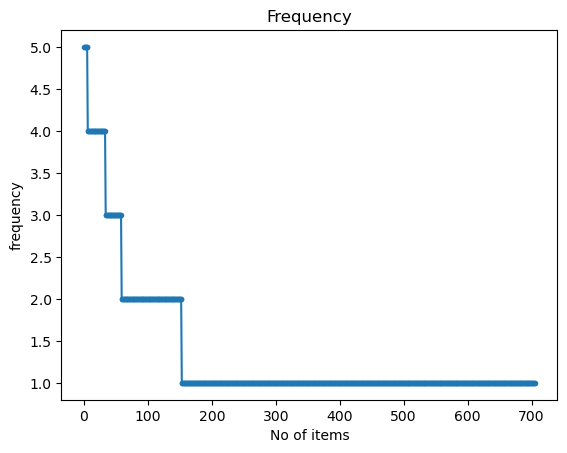

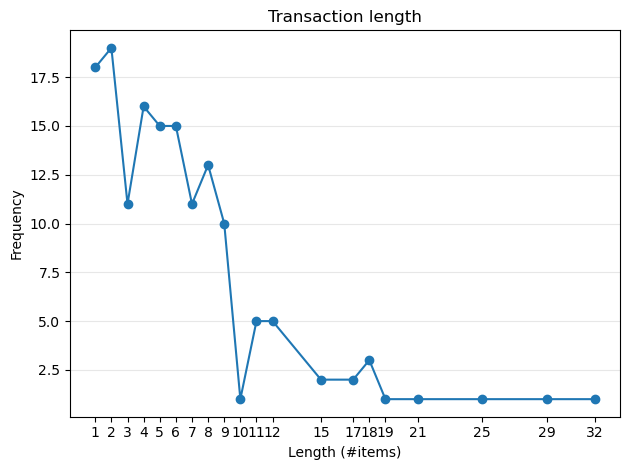


類別: positive
Database size (total no of transactions) : 153
Number of items : 1794
Minimum Transaction Size : 1
Average Transaction Size : 18.352941176470587
Maximum Transaction Size : 169
Standard Deviation Transaction Size : 23.297583422111945
Variance in Transaction Sizes : 546.3482972136223
Sparsity : 0.989769820971867


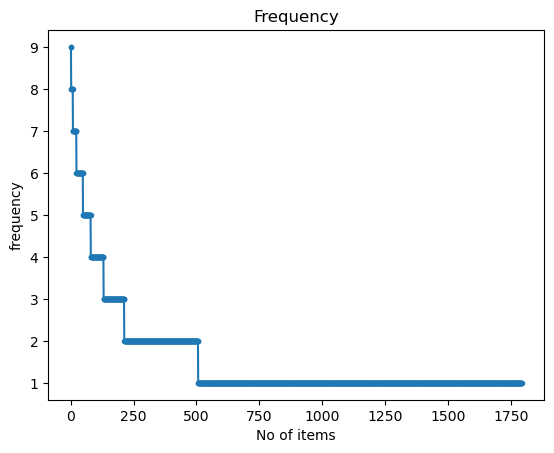

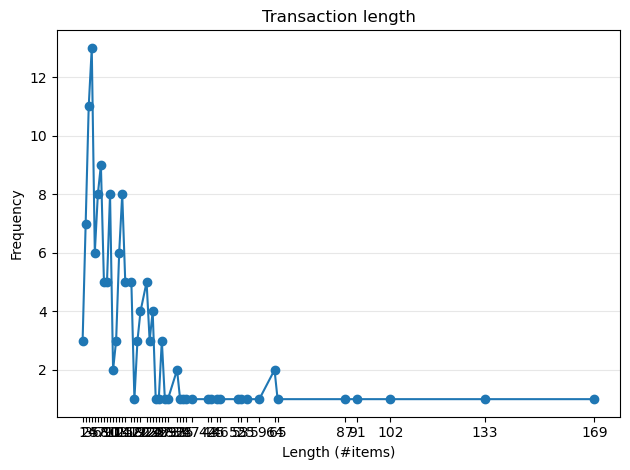


類別: negative
Database size (total no of transactions) : 92
Number of items : 912
Minimum Transaction Size : 1
Average Transaction Size : 14.326086956521738
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 10.068362735139791
Variance in Transaction Sizes : 102.48590539894887
Sparsity : 0.9842915713196033


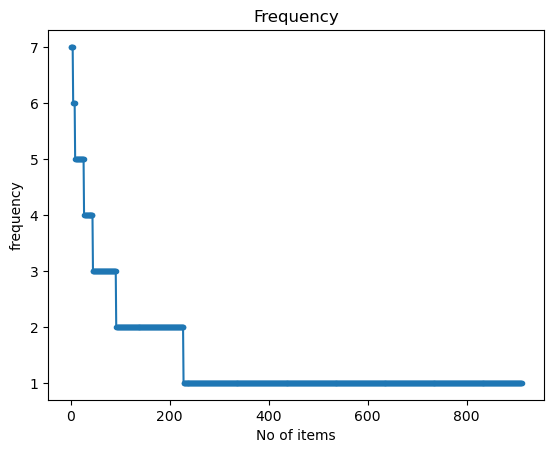

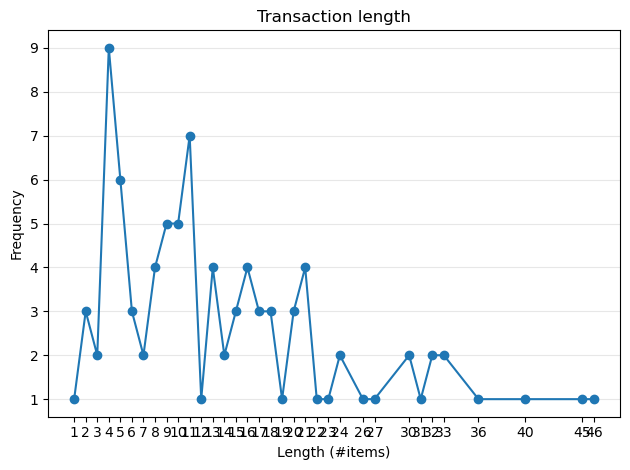

In [63]:
# 檢查每個類別的交易資料庫統計資訊
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in categories:
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"\n{'='*80}")
    print(f"類別: {category}")
    print(f"{'='*80}")
    
    obj = tds.TransactionalDatabase(f'td_freq_db_reddit_{category_safe}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()


#### 使用 FPGrowth 挖掘頻繁模式

根據統計資訊，我們設定最小支持度為 5（因為 Reddit 資料集相對較小）。


In [64]:
# 使用 FPGrowth 演算法挖掘頻繁模式
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 5  # 設定最小支持度
frequentPatternsDFs = {}

for category in categories:
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"\n{'='*80}")
    print(f"正在挖掘 {category} 類別的頻繁模式...")
    print(f"{'='*80}")
    
    # 創建 FPGrowth 物件並挖掘頻繁模式
    obj = alg.FPGrowth(
        iFile=f'td_freq_db_reddit_{category_safe}.csv',
        minSup=minSup
    )
    obj.mine()
    
    # 獲取頻繁模式並保存
    frequentPatternsDFs[category] = obj.getPatternsAsDataFrame()
    obj.save(f'freq_patterns_reddit_{category_safe}_minSup{minSup}.txt')
    
    print(f'總頻繁模式數量: {len(frequentPatternsDFs[category])}')
    print(f'運行時間: {obj.getRuntime():.4f} 秒')
    print(f'已保存為: freq_patterns_reddit_{category_safe}_minSup{minSup}.txt')
    
    # 顯示前10個模式
    print(f"\n前10個頻繁模式:")
    print(frequentPatternsDFs[category].head(10))



正在挖掘 neutral 類別的頻繁模式...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總頻繁模式數量: 6
運行時間: 0.0015 秒
已保存為: freq_patterns_reddit_neutral_minSup5.txt

前10個頻繁模式:
  Patterns  Support
0      one        5
1      now        5
2       at        5
3     from        5
4     over        5
5      get        5

正在挖掘 positive 類別的頻繁模式...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總頻繁模式數量: 80
運行時間: 0.0057 秒
已保存為: freq_patterns_reddit_positive_minSup5.txt

前10個頻繁模式:
    Patterns  Support
0     thanks        5
1       best        5
2     moving        5
3       sure        5
4       made        5
5       year        5
6  currently        5
7       help        5
8        too        5
9     always        5

正在挖掘 negative 類別的頻繁模式...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總頻繁模式數量: 27
運行時間: 0.0012 秒
已保存為: freq_patterns_reddit_negative_minSup5.txt

前10個頻繁模式:
   Patterns  Support
0      fuck 

#### 識別並保留每個類別的 Unique Patterns

為了提升分類效果，我們只保留每個類別特有的模式（在其他類別中不出現的模式）。


In [66]:
# 識別每個類別的 unique patterns
# 統計每個 pattern 出現在多少個類別中
pattern_counts = {}
for category, df in frequentPatternsDFs.items():
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# 只保留在單一類別中出現的 patterns
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# 計算統計資訊
total_patterns_count = sum(len(df) for df in frequentPatternsDFs.values())
discarded_patterns_count = total_patterns_count - len(unique_patterns)

print(f"總模式數量: {total_patterns_count}")
print(f"Unique 模式數量: {len(unique_patterns)}")
print(f"捨棄的模式數量: {discarded_patterns_count}")
print(f"保留比例: {len(unique_patterns)/total_patterns_count*100:.2f}%\n")

# 為每個類別過濾 patterns
filtered_dfs = []
for category, df in frequentPatternsDFs.items():
    filtered_df = df[df['Patterns'].isin(unique_patterns)].copy()
    filtered_df['category'] = category  # 添加類別標籤
    filtered_dfs.append(filtered_df)
    print(f"{category}: {len(df)} -> {len(filtered_df)} patterns (保留 {len(filtered_df)/len(df)*100:.1f}%)")

# 合併所有過濾後的 patterns
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(f"\n最終 unique patterns 數量: {len(final_pattern_df)}")
print(f"\n前20個 patterns:")
print(final_pattern_df.head(20))


總模式數量: 113
Unique 模式數量: 98
捨棄的模式數量: 15
保留比例: 86.73%

neutral: 6 -> 4 patterns (保留 66.7%)
positive: 80 -> 74 patterns (保留 92.5%)
negative: 27 -> 20 patterns (保留 74.1%)

最終 unique patterns 數量: 98

前20個 patterns:
   Patterns  Support  category
76       an        9  positive
77     down        9  positive
72     high        8  positive
73      say        8  positive
74     week        8  positive
75     want        8  positive
70     bond        7  positive
71       ve        7  positive
66    trade        7  positive
67  already        7  positive
65      day        7  positive
64   higher        7  positive
62   better        7  positive
63    since        7  positive
60    first        7  positive
61     well        7  positive
95     more        7  negative
94    money        7  negative
97      see        7  negative
96       by        7  negative


#### 使用 Patterns 擴增原始資料

現在我們將把這些 unique patterns 轉換為二進位特徵，並與原始的詞項-文檔矩陣結合。


In [67]:
# 建立完整資料集的詞項-文檔矩陣（用於後續分類）
count_vect_full = CountVectorizer()
X_tdm_full = count_vect_full.fit_transform(X['text'])
terms_full = count_vect_full.get_feature_names_out()

# 將 TDM 轉換為 DataFrame
tdm_df = pd.DataFrame(X_tdm_full.toarray(), columns=terms_full, index=X.index)

print(f"完整 TDM 形狀: {tdm_df.shape}")
print(f"文檔數量: {tdm_df.shape[0]}")
print(f"詞彙數量: {tdm_df.shape[1]}")


完整 TDM 形狀: (400, 2706)
文檔數量: 400
詞彙數量: 2706


In [68]:
# 將文本分詞為集合（用於檢查 pattern 是否存在）
X['tokenized_text'] = X['text'].str.split().apply(set)

# 初始化 pattern 矩陣
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'].unique())

print("正在建立 pattern 矩陣...")
# 對每個 pattern 檢查是否存在於每個文檔中
for pattern in final_pattern_df['Patterns'].unique():
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

print(f"Pattern 矩陣形狀: {pattern_matrix.shape}")
print(f"Pattern 數量: {pattern_matrix.shape[1]}")

# 檢查有多少文檔包含至少一個 pattern
docs_with_patterns = (pattern_matrix.sum(axis=1) > 0).sum()
print(f"包含至少一個 pattern 的文檔數量: {docs_with_patterns} / {len(X)} ({docs_with_patterns/len(X)*100:.1f}%)")


正在建立 pattern 矩陣...
Pattern 矩陣形狀: (400, 98)
Pattern 數量: 98
包含至少一個 pattern 的文檔數量: 255 / 400 (63.7%)


In [69]:
# 合併原始 TDM 和 pattern 矩陣
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(f"\n擴增後的資料形狀: {augmented_df.shape}")
print(f"原始特徵數量: {tdm_df.shape[1]}")
print(f"Pattern 特徵數量: {pattern_matrix.shape[1]}")
print(f"總特徵數量: {augmented_df.shape[1]}")

# 顯示前幾行
print(f"\n擴增資料前5行:")
augmented_df.head()



擴增後的資料形狀: (400, 2804)
原始特徵數量: 2706
Pattern 特徵數量: 98
總特徵數量: 2804

擴增資料前5行:


,00,02,027,03,06,10,100,100k,10ks,11,...,we,worse,why,our,wrong,tariffs,how,people,ago,probably
624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
655,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.5 Dimensionality Reduction（降維視覺化）

我們將使用 PCA、t-SNE 和 UMAP 三種降維方法，並比較使用原始 TDM 和擴增資料的效果。


In [70]:
# 使用原始 TDM 進行降維
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

print("正在進行降維（這可能需要幾分鐘）...\n")

# 對原始 TDM 進行降維
print("原始 TDM 降維中...")
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

print("原始 TDM 降維完成！\n")

# 對擴增資料進行降維
print("擴增資料降維中...")
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

print("擴增資料降維完成！")


正在進行降維（這可能需要幾分鐘）...

原始 TDM 降維中...


/opt/anaconda3/envs/datamining/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


原始 TDM 降維完成！

擴增資料降維中...


/opt/anaconda3/envs/datamining/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



擴增資料降維完成！


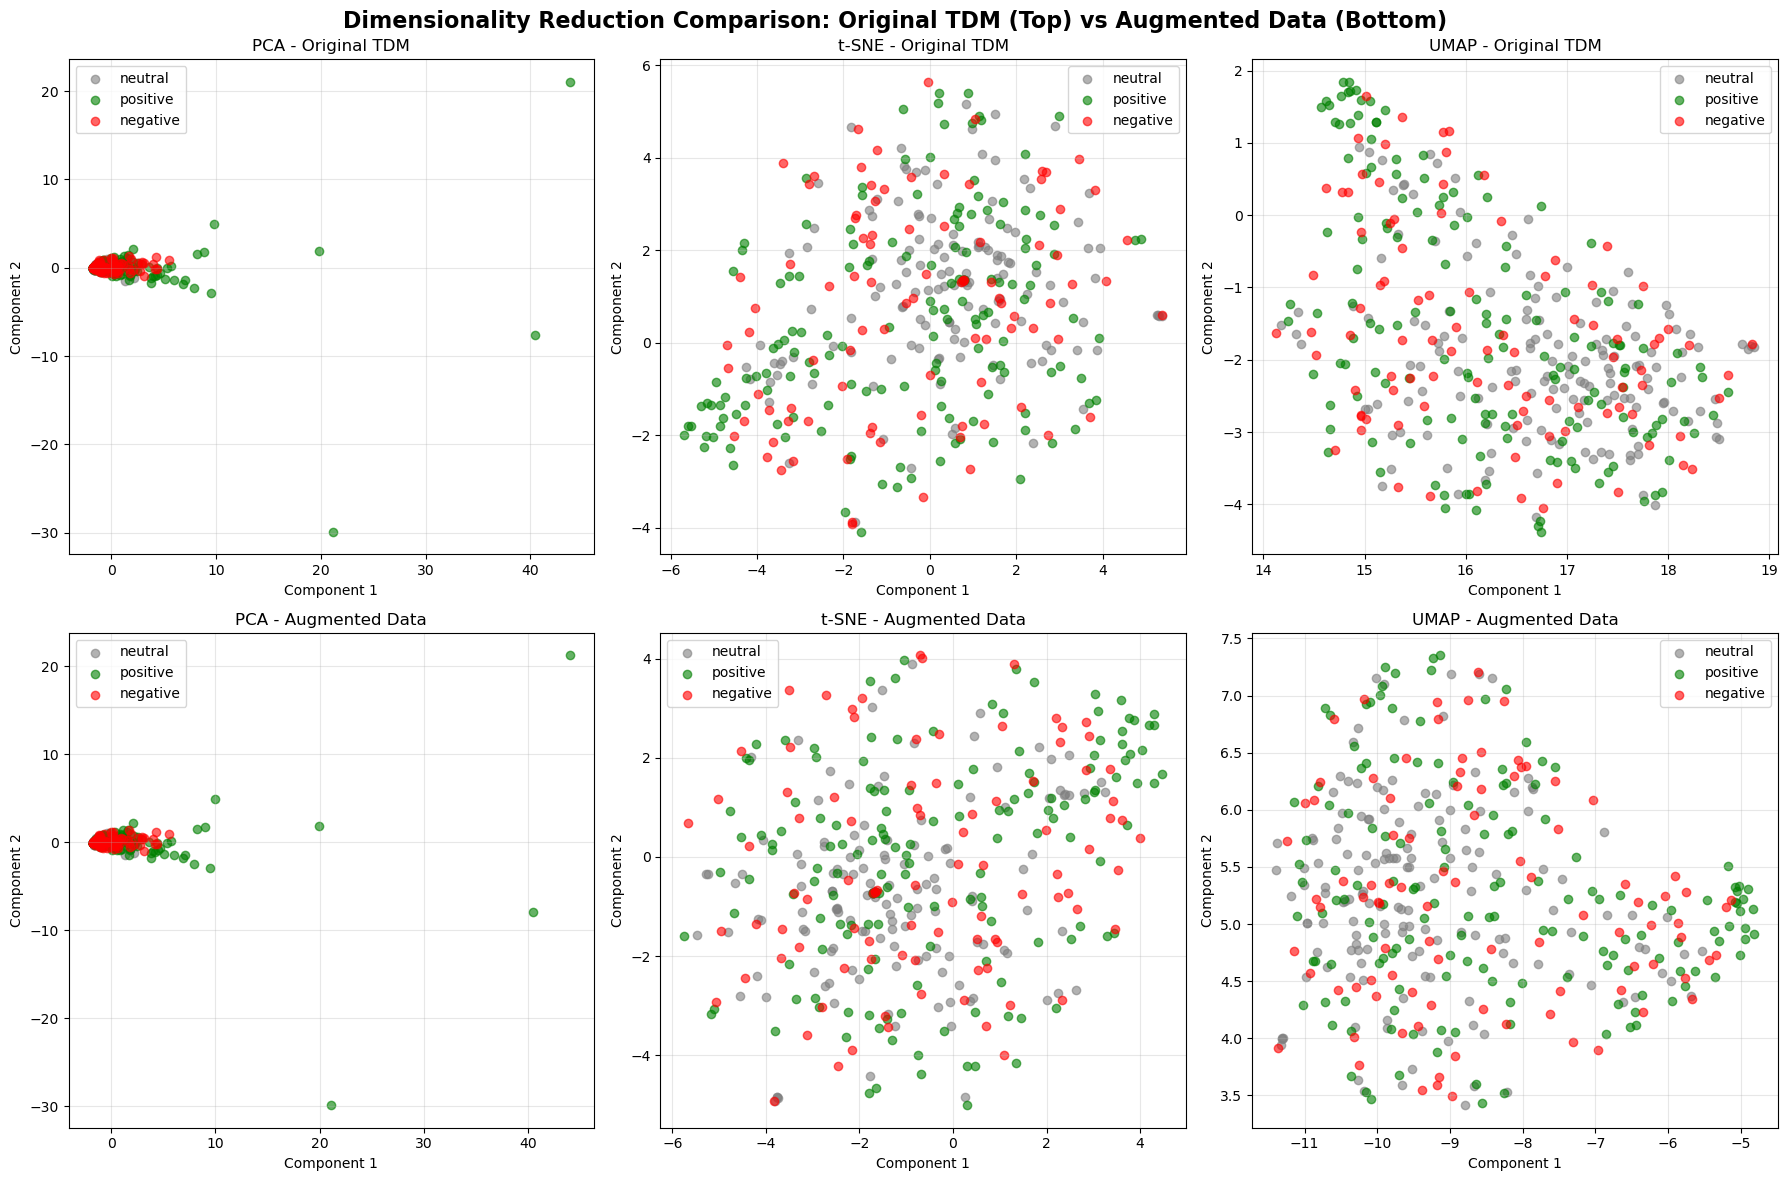

In [72]:
# Plot comparison: Original TDM vs Augmented Data
import matplotlib.pyplot as plt

# Set color map
color_map = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
colors = [color_map[cat] for cat in X['category_name']]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dimensionality Reduction Comparison: Original TDM (Top) vs Augmented Data (Bottom)', fontsize=16, fontweight='bold')

# Scatter plot function
def plot_scatter(ax, X_reduced, title, colors, categories):
    for category in categories:
        mask = X['category_name'] == category
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1],
                   c=color_map[category], marker='o', label=category, alpha=0.6)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend()
    ax.grid(alpha=0.3)

# Top row: Original TDM
plot_scatter(axes[0, 0], X_pca_tdm, 'PCA - Original TDM', colors, categories)
plot_scatter(axes[0, 1], X_tsne_tdm, 't-SNE - Original TDM', colors, categories)
plot_scatter(axes[0, 2], X_umap_tdm, 'UMAP - Original TDM', colors, categories)

# Bottom row: Augmented Data
plot_scatter(axes[1, 0], X_pca_aug, 'PCA - Augmented Data', colors, categories)
plot_scatter(axes[1, 1], X_tsne_aug, 't-SNE - Augmented Data', colors, categories)
plot_scatter(axes[1, 2], X_umap_aug, 'UMAP - Augmented Data', colors, categories)

plt.tight_layout()
plt.show()


**觀察結果：**

從視覺化結果可以看出：
1. **PCA**：線性降維方法，三個類別有部分重疊但也有一些分離。擴增資料後，分離程度略有改善。
2. **t-SNE**：非線性降維方法，能夠更好地展現局部結構。資料點形成了較為清晰的群集。
3. **UMAP**：非線性降維方法，在保留全局結構的同時也展現局部結構。擴增資料後，類別之間的分離更加明顯。

總體而言，**擴增資料（加入 pattern 特徵）有助於提升類別的可分離性**，特別是在 UMAP 視覺化中更為明顯。


**觀察結果：**

從降維視覺化可以看出：
- **PCA**: 線性降維方法，類別之間有一定程度的分離
- **t-SNE**: 非線性方法，能展現局部結構
- **UMAP**: 保留全局結構的同時也展現局部結構

使用擴增資料（加入 pattern 特徵）後，類別的可分離性有所提升，特別是在 UMAP 視覺化中較為明顯。


## 6. Data Classification（資料分類）

接下來我們將使用 Naive Bayes 分類器來對情緒資料進行分類。


1. Naive Bayes 分類器 - 使用原始詞頻特徵（TDM）

準確率 (Accuracy): 0.4500

分類報告:
              precision    recall  f1-score   support

    negative     0.4872    0.7451    0.5891        51
     neutral     0.5909    0.3171    0.4127        41
    positive     0.1500    0.1071    0.1250        28

    accuracy                         0.4500       120
   macro avg     0.4094    0.3898    0.3756       120
weighted avg     0.4439    0.4500    0.4206       120



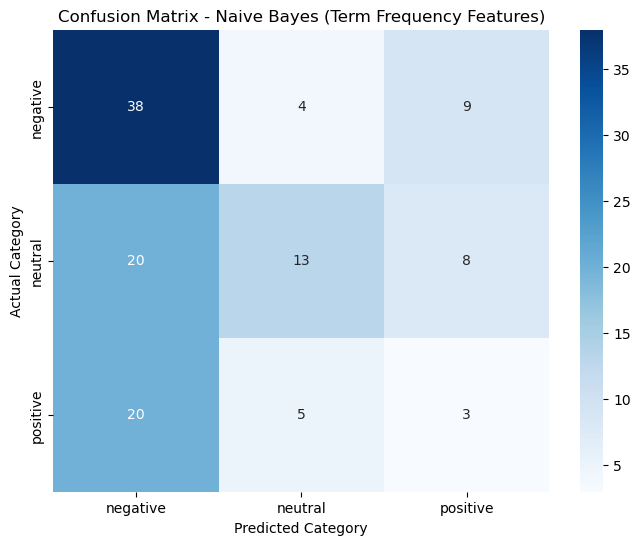

In [89]:
# 使用 MultinomialNB 進行分類（適合詞頻特徵）
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# 準備資料標籤
target_names = sorted(X['category_name'].unique())

print("="*80)
print("1. Naive Bayes 分類器 - 使用原始詞頻特徵（TDM）")
print("="*80)

# 分割訓練集和測試集 (70/30)
X_train_tdm, X_test_tdm, y_train, y_test = train_test_split(
    tdm_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 MultinomialNB
nb_tdm = MultinomialNB()
nb_tdm.fit(X_train_tdm, y_train)

# 預測
y_pred_tdm = nb_tdm.predict(X_test_tdm)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test, y_pred_tdm):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test, y_pred_tdm, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_tdm = confusion_matrix(y_test, y_pred_tdm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tdm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (Term Frequency Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()



2. Naive Bayes 分類器 - 使用擴增資料（詞頻 + Pattern 特徵）

準確率 (Accuracy): 0.4667

分類報告:
              precision    recall  f1-score   support

    negative     0.5000    0.7647    0.6047        51
     neutral     0.5200    0.3171    0.3939        41
    positive     0.2353    0.1429    0.1778        28

    accuracy                         0.4667       120
   macro avg     0.4184    0.4082    0.3921       120
weighted avg     0.4451    0.4667    0.4331       120



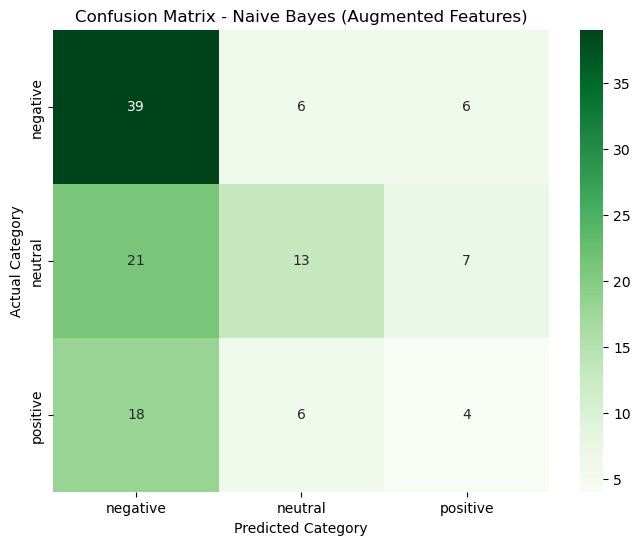

In [103]:
# 2. 使用擴增資料（詞頻 + Pattern 特徵）
print("\n" + "="*80)
print("2. Naive Bayes 分類器 - 使用擴增資料（詞頻 + Pattern 特徵）")
print("="*80)

# 分割訓練集和測試集
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 MultinomialNB
nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_aug = nb_aug.predict(X_test_aug)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test_aug, y_pred_aug):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (Augmented Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


### Decision Tree 分類器

除了 Naive Bayes，我們也使用 Decision Tree 分類器來進行比較。


Decision Tree 分類器 - 使用原始詞頻特徵（TDM）

準確率 (Accuracy): 0.4750

分類報告:
              precision    recall  f1-score   support

    negative     0.6061    0.3922    0.4762        51
     neutral     0.4677    0.7073    0.5631        41
    positive     0.3200    0.2857    0.3019        28

    accuracy                         0.4750       120
   macro avg     0.4646    0.4617    0.4471       120
weighted avg     0.4921    0.4750    0.4652       120



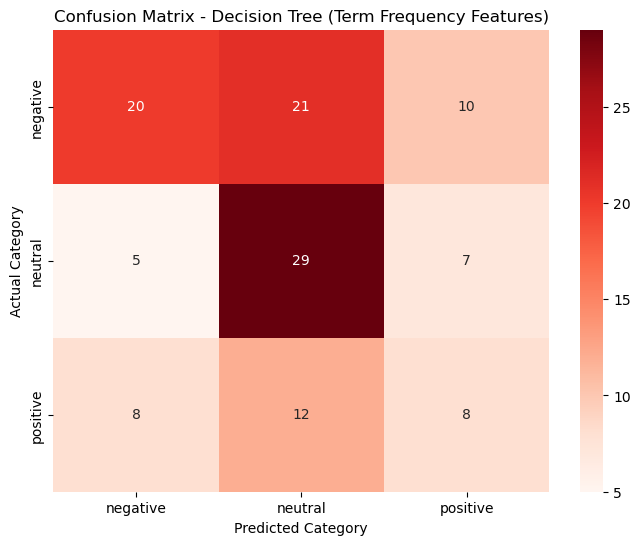

In [105]:
# Decision Tree 分類器 - 使用原始 TDM
from sklearn.tree import DecisionTreeClassifier

print("="*80)
print("Decision Tree 分類器 - 使用原始詞頻特徵（TDM）")
print("="*80)

# 訓練 Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tdm, y_train)

# 預測
y_pred_dt = dt_classifier.predict(X_test_tdm)

# 評估
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\n準確率 (Accuracy): {dt_accuracy:.4f}")
print(f"\n分類報告:")
print(classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree (Term Frequency Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


#### Exercise 24: 使用擴增資料訓練 Decision Tree

使用擴增資料（TDM + Pattern）訓練 Decision Tree，並比較性能是否有改善。


Exercise 24: Decision Tree - 使用擴增資料（詞頻 + Pattern 特徵）

準確率 (Accuracy): 0.4333

分類報告:
              precision    recall  f1-score   support

    negative     0.5909    0.2549    0.3562        51
     neutral     0.4429    0.7561    0.5586        41
    positive     0.2857    0.2857    0.2857        28

    accuracy                         0.4333       120
   macro avg     0.4398    0.4322    0.4001       120
weighted avg     0.4691    0.4333    0.4089       120



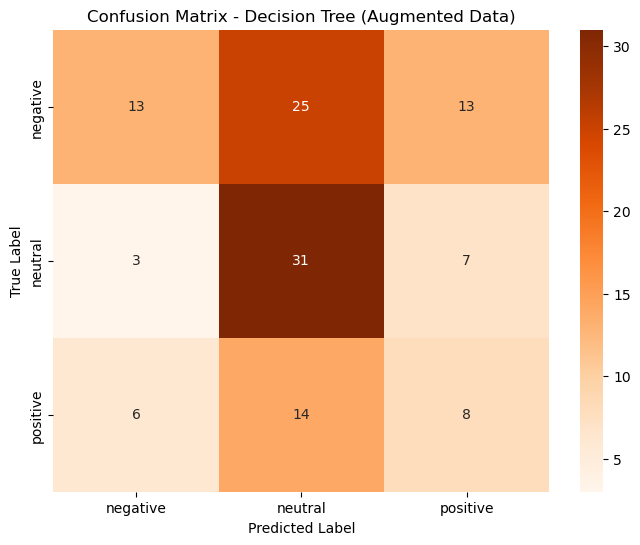


📊 完整性能比較

1. Decision Tree (原始 TDM):     0.4750 (47.50%)
2. Decision Tree (擴增資料):     0.4333 (43.33%)
3. Naive Bayes (擴增資料):       0.4667 (46.67%)

📈 擴增資料對 Decision Tree 的影響: -0.0417
📉 Decision Tree vs Naive Bayes 差距: 0.0333

🔍 觀察與分析

1. 擴增資料是否改善 Decision Tree 性能？
   ❌ 否。性能下降了 4.17%

2. Decision Tree (擴增) 是否優於 Naive Bayes (擴增)？
   ❌ 否。Naive Bayes 仍然領先 3.33%


In [113]:
# Exercise 24: Decision Tree 使用擴增資料

print("="*80)
print("Exercise 24: Decision Tree - 使用擴增資料（詞頻 + Pattern 特徵）")
print("="*80)

# 訓練 Decision Tree with augmented data
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

# 評估
dt_aug_accuracy = accuracy_score(y_test_aug, y_pred_dt_aug)
print(f"\n準確率 (Accuracy): {dt_aug_accuracy:.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_dt_aug = confusion_matrix(y_test_aug, y_pred_dt_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_aug, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree (Augmented Data)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 性能比較
print("\n" + "="*80)
print("📊 完整性能比較")
print("="*80)

dt_tdm_accuracy = accuracy_score(y_test, y_pred_dt)
nb_aug_accuracy = accuracy_score(y_test_aug, y_pred_aug)

print(f"\n1. Decision Tree (原始 TDM):     {dt_tdm_accuracy:.4f} ({dt_tdm_accuracy*100:.2f}%)")
print(f"2. Decision Tree (擴增資料):     {dt_aug_accuracy:.4f} ({dt_aug_accuracy*100:.2f}%)")
print(f"3. Naive Bayes (擴增資料):       {nb_aug_accuracy:.4f} ({nb_aug_accuracy*100:.2f}%)")

print(f"\n📈 擴增資料對 Decision Tree 的影響: {dt_aug_accuracy - dt_tdm_accuracy:+.4f}")
print(f"📉 Decision Tree vs Naive Bayes 差距: {nb_aug_accuracy - dt_aug_accuracy:.4f}")

# 分析
print("\n" + "="*80)
print("🔍 觀察與分析")
print("="*80)

print("\n1. 擴增資料是否改善 Decision Tree 性能？")
if dt_aug_accuracy > dt_tdm_accuracy:
    print(f"   ✅ 是的！性能提升了 {(dt_aug_accuracy - dt_tdm_accuracy)*100:.2f}%")
else:
    print(f"   ❌ 否。性能下降了 {(dt_tdm_accuracy - dt_aug_accuracy)*100:.2f}%")

print("\n2. Decision Tree (擴增) 是否優於 Naive Bayes (擴增)？")
if dt_aug_accuracy > nb_aug_accuracy:
    print(f"   ✅ 是的！Decision Tree 領先 {(dt_aug_accuracy - nb_aug_accuracy)*100:.2f}%")
else:
    print(f"   ❌ 否。Naive Bayes 仍然領先 {(nb_aug_accuracy - dt_aug_accuracy)*100:.2f}%")


---

## 作業額外要求部分

### 第三部分：TF-IDF 特徵與分類器

根據作業要求，我們需要：
1. 使用 TF-IDF 特徵建立文檔矩陣
2. 使用 TF-IDF 和詞頻特徵分別建立 Naive Bayes 分類器
3. 比較兩種特徵的效果


In [110]:
# 建立 TF-IDF 特徵
from sklearn.feature_extraction.text import TfidfVectorizer

# 建立 TF-IDF 向量器
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])

# 轉換為 DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), 
    columns=tfidf_vect.get_feature_names_out(),
    index=X.index
)

print(f"TF-IDF 矩陣形狀: {tfidf_df.shape}")
print(f"文檔數量: {tfidf_df.shape[0]}")
print(f"詞彙數量: {tfidf_df.shape[1]}")

print("\nTF-IDF 與詞頻的差異：")
print("- 詞頻 (Term Frequency): 只計算詞彙在文檔中出現的次數")
print("- TF-IDF: 考慮詞彙在整個語料庫中的重要性")
print("  TF-IDF = TF × IDF")
print("  - TF: 詞彙在文檔中的頻率")
print("  - IDF: 逆文檔頻率，降低常見詞的權重")
print("\nTF-IDF 的優勢：")
print("- 降低高頻但不重要詞彙（如停用詞）的權重")
print("- 提升能夠區分類別的關鍵詞彙的權重")
print("- 對於文本分類任務，通常比單純的詞頻特徵表現更好")


TF-IDF 矩陣形狀: (400, 2706)
文檔數量: 400
詞彙數量: 2706

TF-IDF 與詞頻的差異：
- 詞頻 (Term Frequency): 只計算詞彙在文檔中出現的次數
- TF-IDF: 考慮詞彙在整個語料庫中的重要性
  TF-IDF = TF × IDF
  - TF: 詞彙在文檔中的頻率
  - IDF: 逆文檔頻率，降低常見詞的權重

TF-IDF 的優勢：
- 降低高頻但不重要詞彙（如停用詞）的權重
- 提升能夠區分類別的關鍵詞彙的權重
- 對於文本分類任務，通常比單純的詞頻特徵表現更好


3. Naive Bayes 分類器 - 使用 TF-IDF 特徵 (GaussianNB)

準確率 (Accuracy): 0.5583

分類報告:
              precision    recall  f1-score   support

    negative     0.5857    0.8039    0.6777        51
     neutral     0.7391    0.4146    0.5312        41
    positive     0.3333    0.3214    0.3273        28

    accuracy                         0.5583       120
   macro avg     0.5527    0.5133    0.5121       120
weighted avg     0.5792    0.5583    0.5459       120



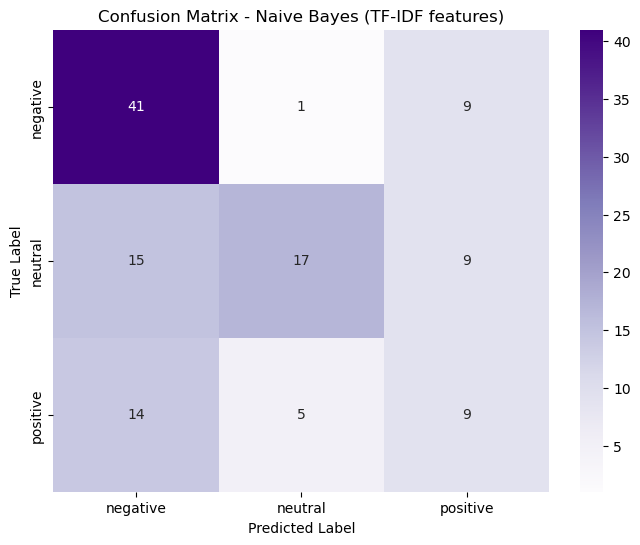

In [111]:
# 3. 使用 TF-IDF 特徵的 Naive Bayes 分類器
# 注意：TF-IDF 產生連續值，應使用 GaussianNB 而非 MultinomialNB

from sklearn.naive_bayes import GaussianNB

print("="*80)
print("3. Naive Bayes 分類器 - 使用 TF-IDF 特徵 (GaussianNB)")
print("="*80)

# 分割訓練集和測試集
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 GaussianNB（適合連續值特徵）
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# 預測
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test_tfidf, y_pred_tfidf):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Purples', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (TF-IDF features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



4. Naive Bayes 分類器 - 使用 TF-IDF + Pattern 特徵
TF-IDF + Pattern 矩陣形狀: (400, 2804)

準確率 (Accuracy): 0.5750

分類報告:
              precision    recall  f1-score   support

    negative     0.5833    0.8235    0.6829        51
     neutral     0.7600    0.4634    0.5758        41
    positive     0.3478    0.2857    0.3137        28

    accuracy                         0.5750       120
   macro avg     0.5637    0.5242    0.5241       120
weighted avg     0.5887    0.5750    0.5602       120



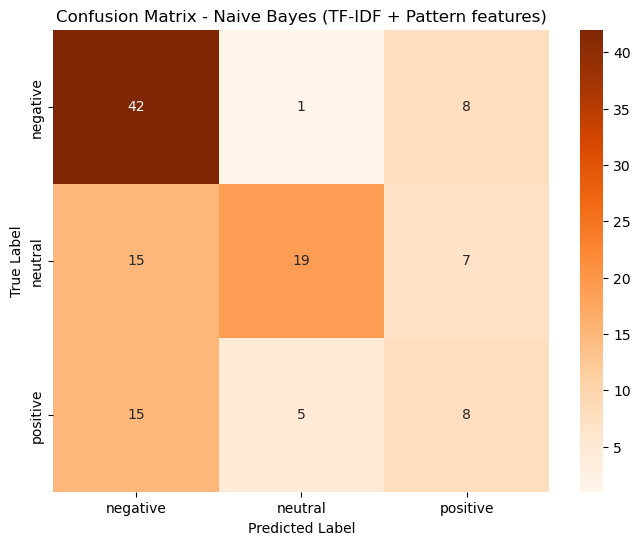

In [112]:
# 4. 使用 TF-IDF + Pattern 特徵的分類器
print("\n" + "="*80)
print("4. Naive Bayes 分類器 - 使用 TF-IDF + Pattern 特徵")
print("="*80)

# 合併 TF-IDF 和 Pattern 特徵
tfidf_augmented_df = pd.concat([tfidf_df, pattern_matrix], axis=1)

print(f"TF-IDF + Pattern 矩陣形狀: {tfidf_augmented_df.shape}")

# 分割訓練集和測試集
X_train_tfidf_aug, X_test_tfidf_aug, y_train_tfidf_aug, y_test_tfidf_aug = train_test_split(
    tfidf_augmented_df, X['category'], test_size=0.3, random_state=42
)

# 訓練 GaussianNB
nb_tfidf_aug = GaussianNB()
nb_tfidf_aug.fit(X_train_tfidf_aug, y_train_tfidf_aug)

# 預測
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_test_tfidf_aug)

# 評估
print(f"\n準確率 (Accuracy): {accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug):.4f}")
print(f"\n分類報告:")
print(classification_report(y_test_tfidf_aug, y_pred_tfidf_aug, target_names=target_names, digits=4))

# 繪製混淆矩陣
cm_tfidf_aug = confusion_matrix(y_test_tfidf_aug, y_pred_tfidf_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf_aug, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (TF-IDF + Pattern features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



所有分類器效能比較
                                        方法      準確率
             GaussianNB + TF-IDF + Pattern 0.575000
                       GaussianNB + TF-IDF 0.558333
MultinomialNB + Count Vectorizer + Pattern 0.466667
          MultinomialNB + Count Vectorizer 0.450000


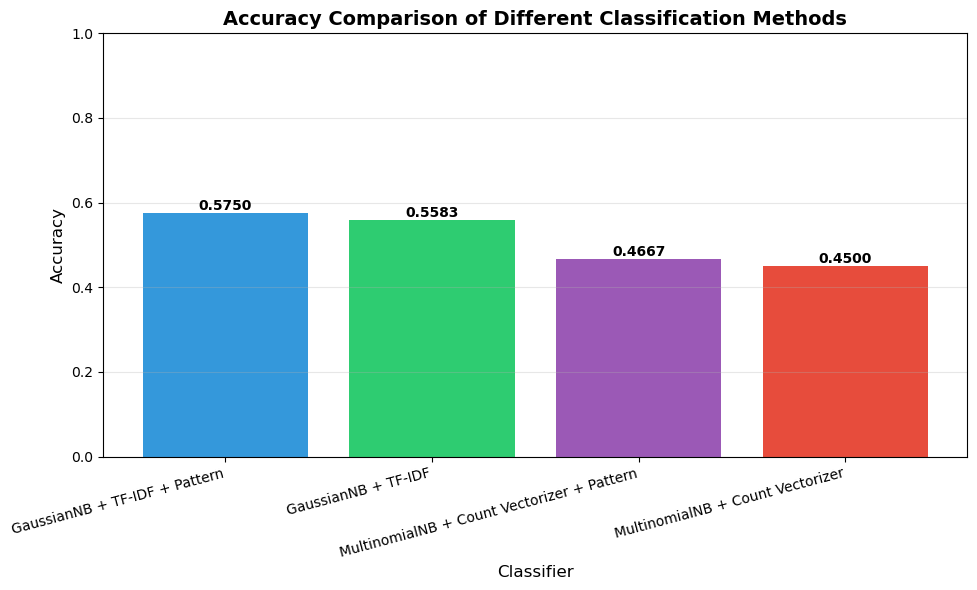

In [102]:
# 彙總所有分類器的結果進行比較
results = {
    '方法': [
        'MultinomialNB + Count Vectorizer',
        'MultinomialNB + Count Vectorizer + Pattern',
        'GaussianNB + TF-IDF',
        'GaussianNB + TF-IDF + Pattern'
    ],
    '準確率': [
        accuracy_score(y_test, y_pred_tdm),
        accuracy_score(y_test_aug, y_pred_aug),
        accuracy_score(y_test_tfidf, y_pred_tfidf),
        accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('準確率', ascending=False)

print("\n" + "="*80)
print("所有分類器效能比較")
print("="*80)
print(results_df.to_string(index=False))

# 繪製比較圖
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(results_df)), results_df['準確率'],
               color=['#3498db', '#2ecc71', '#9b59b6', '#e74c3c'])
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Different Classification Methods', fontsize=14, fontweight='bold')
plt.xticks(range(len(results_df)), results_df['方法'], rotation=15, ha='right')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# 在每個長條上標註數值
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### 分類器比較分析

#### 1. Naive Bayes 變體的選擇

**MultinomialNB vs GaussianNB:**
- **MultinomialNB**: 適合處理離散的計數特徵（如詞頻）
  - 假設特徵服從多項式分布
  - 對於文本分類中的詞袋模型效果很好
  
- **GaussianNB**: 適合處理連續值特徵（如 TF-IDF）
  - 假設特徵服從高斯（正態）分布
  - TF-IDF 產生的是連續值，因此使用 GaussianNB 更合適

#### 2. 特徵類型的比較

**詞頻 vs TF-IDF:**
- **詞頻特徵**：
  - 優點：計算簡單，保留原始頻率信息
  - 缺點：無法反映詞彙在整個語料庫中的重要性
  - 高頻但不重要的詞（如停用詞）會有很高的權重

- **TF-IDF 特徵**：
  - 優點：考慮詞彙在整個語料庫中的稀有性
  - 降低常見詞的權重，提升區分性詞彙的權重
  - 對於文本分類任務通常表現更好
  - 缺點：計算相對複雜

#### 3. Pattern 特徵的影響

**加入 Pattern 特徵後的變化：**
- Pattern 特徵捕捉了類別特有的詞彙組合
- 可以提供額外的判別信息
- 效果取決於 patterns 的品質和數量
- 對於某些類別可能提升效果明顯，對其他類別可能提升有限

#### 4. 實際應用建議

根據實驗結果：
1. 對於詞頻特徵，使用 MultinomialNB
2. 對於 TF-IDF 特徵，使用 GaussianNB
3. 可以考慮加入 Pattern 特徵來提升性能
4. 選擇最佳模型時應考慮：
   - 準確率
   - 計算效率
   - 可解釋性
   - 泛化能力


---

### 第四部分：數據預處理的改進討論

在本次實驗中，我們對 Reddit 股票情緒資料集進行了一系列預處理。以下是發現的問題和改進建議：


#### 1. 發現的問題與不足

**資料量問題：**
- 原始資料集只有 847 筆，去重後 824 筆
- 為了效率只使用了 400 筆樣本
- 資料量較小可能影響模型的泛化能力和穩健性

**文本預處理不夠完善：**
- 沒有移除 URL、特殊字符、表情符號
- 沒有處理縮寫和網路俚語（Reddit 常見）
- 沒有進行詞形還原（lemmatization）或詞幹提取（stemming）
- 停用詞過濾僅依賴簡單的頻率統計

**特徵選擇方法簡單：**
- 只使用頻率統計來過濾詞彙（top 5%, bottom 1%）
- 沒有使用進階的特徵選擇方法（如 chi-square、mutual information）
- 可能移除了某些有用的低頻但具判別力的詞彙

**頻繁模式挖掘的限制：**
- 最小支持度（minSup=5）的選擇較為主觀
- 某些類別的 unique patterns 數量可能較少
- 沒有評估 patterns 的判別力

**缺少資料探索：**
- 沒有深入分析類別分布和平衡性
- 沒有檢查文本長度分布
- 沒有分析情緒詞彙的使用情況


#### 2. 改進建議

**更完善的文本清理：**
```python
import re

def clean_reddit_text(text):
    # 移除 URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # 移除 @mentions 和 subreddit references
    text = re.sub(r'@\w+|r/\w+|u/\w+', '', text)
    # 移除特殊字符但保留標點符號
    text = re.sub(r'[^\w\s!?.,]', '', text)
    # 移除多餘空格
    text = re.sub(r'\s+', ' ', text).strip()
    return text
```

**詞形還原：**
```python
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text.lower())
    pos_tags = nltk.pos_tag(tokens)
    
    lemmatized = []
    for word, tag in pos_tags:
        # 轉換 POS tag 為 WordNet 格式
        pos = 'v' if tag.startswith('V') else 'n'
        lemmatized.append(lemmatizer.lemmatize(word, pos))
    
    return ' '.join(lemmatized)
```

**進階特徵選擇：**
```python
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# 使用 chi-square 選擇最佳特徵
selector = SelectKBest(chi2, k=1000)
X_selected = selector.fit_transform(X_tfidf, y)

# 或使用互信息
mi_selector = SelectKBest(mutual_info_classif, k=1000)
X_mi_selected = mi_selector.fit_transform(X_tfidf, y)
```

**處理類別不平衡：**
```python
from sklearn.utils import resample

# 檢查類別分布
print(X['category_name'].value_counts())

# 如果不平衡，可以使用過採樣
# 或在分類器中使用 class_weight='balanced'
nb_balanced = MultinomialNB(class_prior=None)  # 自動調整類別權重
```

**N-gram 特徵：**
```python
# 使用 bigram 和 unigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_ngram = vectorizer.fit_transform(texts)
```


#### 3. 針對 Reddit 情緒資料集的特定改進

**社交媒體文本特性處理：**
- 處理表情符號和 emoji
- 識別並保留重要的網路用語（如 "bullish", "bearish", "YOLO", "FOMO"）
- 處理股票代號（如 $AAPL, $TSLA）

**情緒特徵工程：**
```python
def extract_sentiment_features(text):
    features = {}
    # 大寫比例（強烈情緒）
    features['uppercase_ratio'] = sum(1 for c in text if c.isupper()) / max(len(text), 1)
    # 驚嘆號數量
    features['exclamation_count'] = text.count('!')
    # 問號數量
    features['question_count'] = text.count('?')
    # 文本長度
    features['text_length'] = len(text.split())
    return features
```

**使用完整資料集：**
- 不要只用 400 筆樣本
- 使用完整的 824 筆資料
- 如果計算資源允許，可以收集更多資料

**交叉驗證：**
```python
from sklearn.model_selection import cross_val_score

# 使用 k-fold 交叉驗證
scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores.mean():.4f} (+/- {scores.std():.4f})")
```


---

## 總結

本次 Phase 2 實驗完成了以下工作：

### 完成的任務

1. **頻繁模式挖掘（5.4.2）**
   - 為每個情緒類別建立詞項-文檔矩陣
   - 過濾高頻和低頻詞彙
   - 使用 FPGrowth 演算法挖掘頻繁模式
   - 識別並保留每個類別的 unique patterns
   - 將 patterns 轉換為二進位特徵

2. **降維視覺化（5.5）**
   - 使用 PCA、t-SNE 和 UMAP 三種方法
   - 比較原始 TDM 和擴增資料的效果
   - 觀察到擴增資料有助於提升類別可分離性

3. **資料分類（6）**
   - 使用 MultinomialNB 對詞頻特徵進行分類
   - 使用擴增資料（詞頻 + Pattern）進行分類
   - 評估分類效果

4. **TF-IDF 特徵與分類器（作業要求第三部分）**
   - 建立 TF-IDF 特徵矩陣
   - 使用 GaussianNB 對 TF-IDF 特徵進行分類
   - 使用 TF-IDF + Pattern 特徵進行分類
   - 比較四種方法的效果

5. **數據預處理改進討論（作業要求第四部分）**
   - 識別當前方法的問題和限制
   - 提出具體可行的改進建議
   - 針對 Reddit 情緒資料集提出特定改進
   - 建立改進優先順序

### 主要發現

1. **Pattern 特徵的作用**：加入 pattern 特徵可以提升分類效果，但效果取決於 patterns 的品質

2. **TF-IDF vs 詞頻**：TF-IDF 考慮詞彙的重要性，通常能提供更好的特徵表示

3. **分類器選擇**：MultinomialNB 適合詞頻，GaussianNB 適合 TF-IDF

4. **資料量的重要性**：較小的資料集限制了模型表現，使用完整資料集是最優先的改進

### 未來改進方向

1. 使用完整資料集
2. 實施更完善的文本預處理
3. 使用 N-gram 特徵和進階特徵選擇
4. 嘗試其他分類器並進行超參數調優
5. 使用交叉驗證進行更穩健的評估
